In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL/dataset/playlist_2010to2022.csv')
df = data.copy()

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# **EDA**

In [ ]:
df.describe ()

year  track_popularity  artist_popularity  danceability  \
count  2300.000000       2300.000000        2300.000000   2299.000000   
mean   2011.000000         70.943478          72.869565      0.660116   
std       6.634692         12.291526          12.179263      0.141137   
min    2000.000000          0.000000          29.000000      0.162000   
25%    2005.000000         66.000000          65.000000      0.572000   
50%    2011.000000         72.000000          74.000000      0.671000   
75%    2017.000000         79.000000          82.000000      0.759500   
max    2022.000000        100.000000         100.000000      0.975000   

            energy          key     loudness         mode  speechiness  \
count  2299.000000  2299.000000  2299.000000  2299.000000  2299.000000   
mean      0.693047     5.277947    -5.784040     0.598521     0.097795   
std       0.164838     3.628494     2.080853     0.490304     0.092445   
min       0.051900     0.000000   -21.107000     0.000000     0.022500   
25%       0.586000     2.000000    -6.823500     0.000000     0.038000   
50%       0.712000     5.000000    -5.511000     1.000000     0.056800   
75%       0.820000     8.000000    -4.364500     1.000000     0.115500   
max       0.999000    11.000000    -0.276000     1.000000     0.576000   

       acousticness  instrumentalness     liveness      valence        tempo  \
count   2299.000000       2299.000000  2299.000000  2299.000000  2299.000000   
mean       0.157689          0.013766     0.172618     0.535110   120.512450   
std        0.203844          0.083990     0.131620     0.227821    27.617729   
min        0.000013          0.000000     0.021000     0.037700    60.019000   
25%        0.016500          0.000000     0.089950     0.360500    98.569500   
50%        0.068900          0.000000     0.119000     0.540000   120.000000   
75%        0.223000          0.000054     0.220000     0.722000   137.028000   
max        0.978000          0.985000     0.843000     0.974000   210.857000   

         duration_ms  time_signature  
count    2299.000000     2299.000000  
mean   226033.494128        3.982166  
std     42063.678588        0.219054  
min     97393.000000        1.000000  
25%    200179.500000        4.000000  
50%    221653.000000        4.000000  
75%    245950.000000        4.000000  
max    688453.000000        5.000000

In [ ]:
plt.figure(figsize=(10, 8))
fig1 = px.imshow(df.isnull(),
color_continuous_scale=['black', 'red'],
labels=dict(color="NaN"),
title="")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()


<Figure size 1000x800 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [ ]:
columnas_df=df.columns.tolist()

for i in df:
  print("===========================")
  print(f"{df[i].value_counts()}")

playlist_url
https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk    100
https://open.spotify.com/playlist/37i9dQZF1DX9Ol4tZWPH6V    100
https://open.spotify.com/playlist/37i9dQZF1DX0P7PzzKwEKl    100
https://open.spotify.com/playlist/37i9dQZF1DXaW8fzPh9b08    100
https://open.spotify.com/playlist/37i9dQZF1DWTWdbR13PQYH    100
https://open.spotify.com/playlist/37i9dQZF1DWWzQTBs5BHX9    100
https://open.spotify.com/playlist/37i9dQZF1DX1vSJnMeoy3V    100
https://open.spotify.com/playlist/37i9dQZF1DX3j9EYdzv2N9    100
https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm    100
https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp    100
https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj    100
https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ    100
https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3    100
https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer    100
https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4    100
https://open.spotify.com/pl

In [ ]:
# Understand the Data's Shape
print("Shape of the DataFrame:", df.shape)

# Examine Data Types
print("\nData Types of Columns:\n", df.dtypes)

# Check for Missing Values
print("\nMissing Values per Column:\n", df.isnull().sum())

# Analyze the Timeframe
print("\nRange of Release Years:", df['year'].min(), "-", df['year'].max())

# Initial Summary of Features
print("\nUnique Genres:", df['artist_genres'].nunique())
print("\nNumber of Unique Artists:", df['artist_name'].nunique())
print("\nPopularity Distribution (Mean):", df['track_popularity'].mean())

Shape of the DataFrame: (2300, 23)

Data Types of Columns:
 playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

Missing Values per Column:
 playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0


In [ ]:
# Extract Year and Month
df['release_year'] = df['year']
df['release_month'] = 1  # Assume January if month is not available

# Calculate Song Duration in Minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Artist Popularity Feature
artist_song_counts = df.groupby('artist_name')['track_name'].count()
df['artist_popularity'] = df['artist_name'].map(artist_song_counts)

# Genre Popularity
genre_song_counts = df.explode('artist_genres').groupby('artist_genres')['track_name'].count()
df['genre_popularity'] = df['artist_genres'].apply(lambda x: genre_song_counts.get(x[0], 0) if isinstance(x, list) and len(x) > 0 else 0)

display(df.head())

playlist_url  year  \
0  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
1  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
2  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
3  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
4  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   

                 track_id            track_name  track_popularity  \
0  3AJwUDP919kvQ9QcozQPxg                Yellow                91   
1  2m1hi0nfMR9vdGC8UcrnwU  All The Small Things                84   
2  3y4LxiYMgDl4RethdzpmNe               Breathe                69   
3  60a0Rd6pjrkxjPbaKzXjfq            In the End                88   
4  62bOmKYxYg7dhrC6gH9vFn           Bye Bye Bye                74   

                           album               artist_id  artist_name  \
0                     Parachutes  4gzpq5DPGxSnKTe4SA8HAU     Coldplay   
1             Enema Of The State  6FBDaR13swtiWwGhX1WQsP    blink-182   
2                        Breathe  25NQNriVT2YbSW80ILRWJa   Faith Hill   
3  Hybrid Theory (Bonus Edition)  6XyY86QOPPrYVGvF9ch6wz  Linkin Park   
4            No Strings Attached  6Ff53KvcvAj5U7Z1vojB5o       *NSYNC   

                                       artist_genres  artist_popularity  ...  \
0                          ['permanent wave', 'pop']                 18  ...   
1  ['alternative metal', 'modern rock', 'pop punk...                  2  ...   
2  ['contemporary country', 'country', 'country d...                  2  ...   
3  ['alternative metal', 'nu metal', 'post-grunge...                 10  ...   
4                   ['boy band', 'dance pop', 'pop']                  6  ...   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000121    0.2340    0.285  173.372     266773.0             4.0   
1          0.000000    0.6120    0.684  148.726     167067.0             4.0   
2          0.000000    0.2510    0.278  136.859     250547.0             4.0   
3          0.000000    0.2090    0.400  105.143     216880.0             4.0   
4          0.001200    0.0821    0.861  172.638     200400.0             4.0   

   release_year  release_month  duration_minutes  genre_popularity  
0          2000              1          4.446217                 0  
1          2000              1          2.784450                 0  
2          2000              1          4.175783                 0  
3          2000              1          3.614667                 0  
4          2000              1          3.340000                 0  

[5 rows x 27 columns]

release_year  artist_popularity
0           2000               4.04
1           2001               3.76
2           2002               5.64
3           2003               4.81
4           2004               5.34
5           2005               6.01
6           2006               5.74
7           2007               6.16
8           2008               7.15
9           2009               8.06
10          2010               8.50
11          2011               8.34
12          2012               9.12
13          2013               9.09
14          2014               7.96
15          2015               8.31
16          2016               8.20
17          2017               8.08
18          2018               6.65
19          2019               6.81
20          2020               8.43
21          2021              10.04
22          2022               9.12

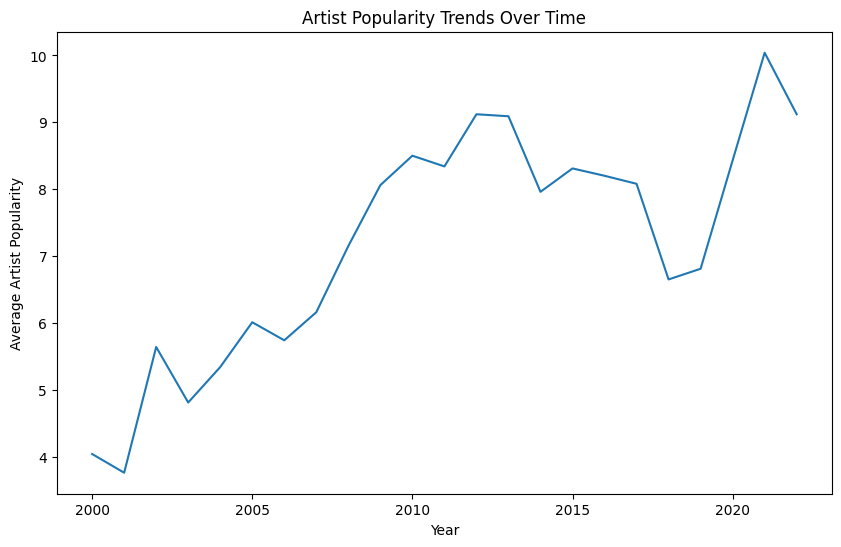

In [ ]:
# Group by year and calculate the average artist popularity for each year
artist_popularity_trends = df.groupby('release_year')['artist_popularity'].mean().reset_index()

# Display the artist popularity trends over the years
display(artist_popularity_trends)

# Plot the artist popularity trends over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(artist_popularity_trends['release_year'], artist_popularity_trends['artist_popularity'])
plt.xlabel('Year')
plt.ylabel('Average Artist Popularity')
plt.title('Artist Popularity Trends Over Time')
plt.show()

release_year  duration_minutes
0           2000          4.146817
1           2001          4.040445
2           2002          4.130478
3           2003          4.064223
4           2004          3.880900
5           2005          3.938118
6           2006          3.833015
7           2007          3.988479
8           2008          3.847741
9           2009          3.902061
10          2010          3.743003
11          2011          3.832927
12          2012          3.820222
13          2013          3.851752
14          2014          3.855865
15          2015          3.673789
16          2016          3.679508
17          2017          3.701285
18          2018          3.552781
19          2019          3.282496
20          2020          3.296727
21          2021          3.277226
22          2022          3.307454

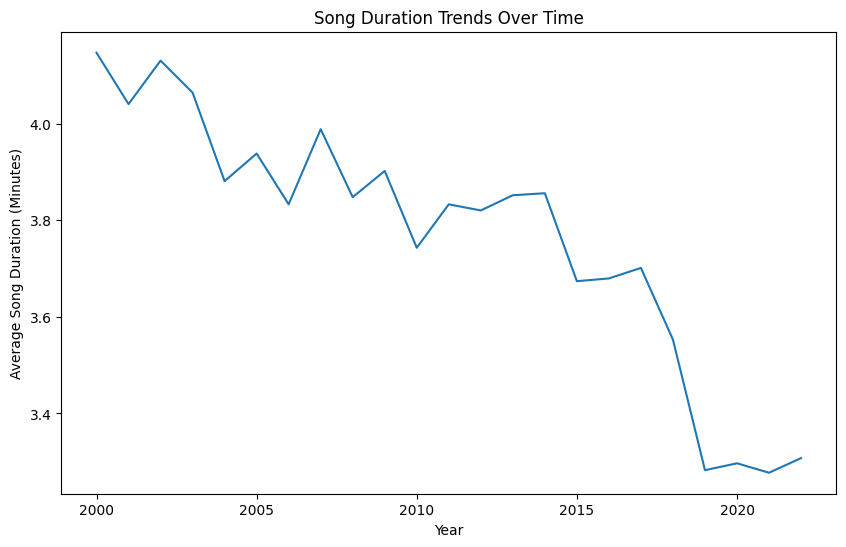

In [ ]:
# Group by year and calculate the mean song duration for each year
duration_trends = df.groupby('release_year')['duration_minutes'].mean().reset_index()

# Display the song duration trends over the years
display(duration_trends)

# Plot the song duration trends over time
plt.figure(figsize=(10, 6))
plt.plot(duration_trends['release_year'], duration_trends['duration_minutes'])
plt.xlabel('Year')
plt.ylabel('Average Song Duration (Minutes)')
plt.title('Song Duration Trends Over Time')
plt.show()

In [ ]:
# Identify Potential Outliers using a Box Plot
numerical_features = ['track_popularity', 'artist_popularity', 'danceability', 'energy', 'tempo']


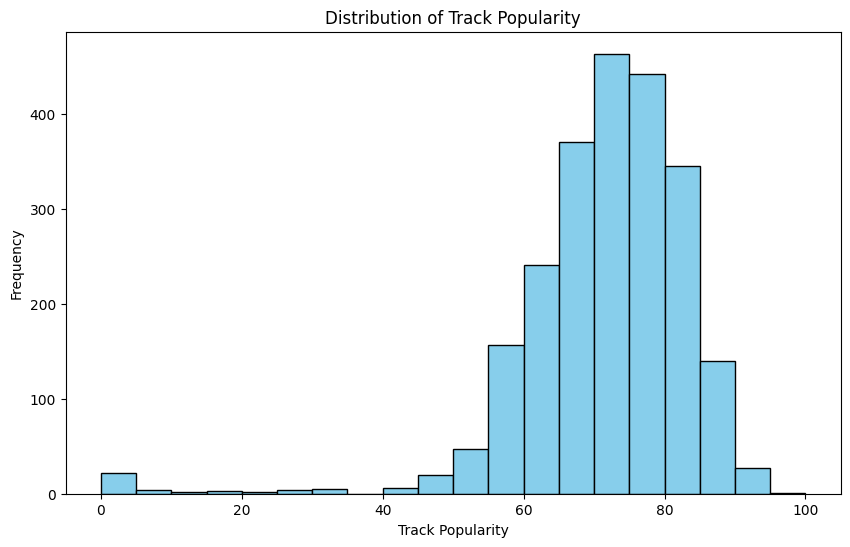

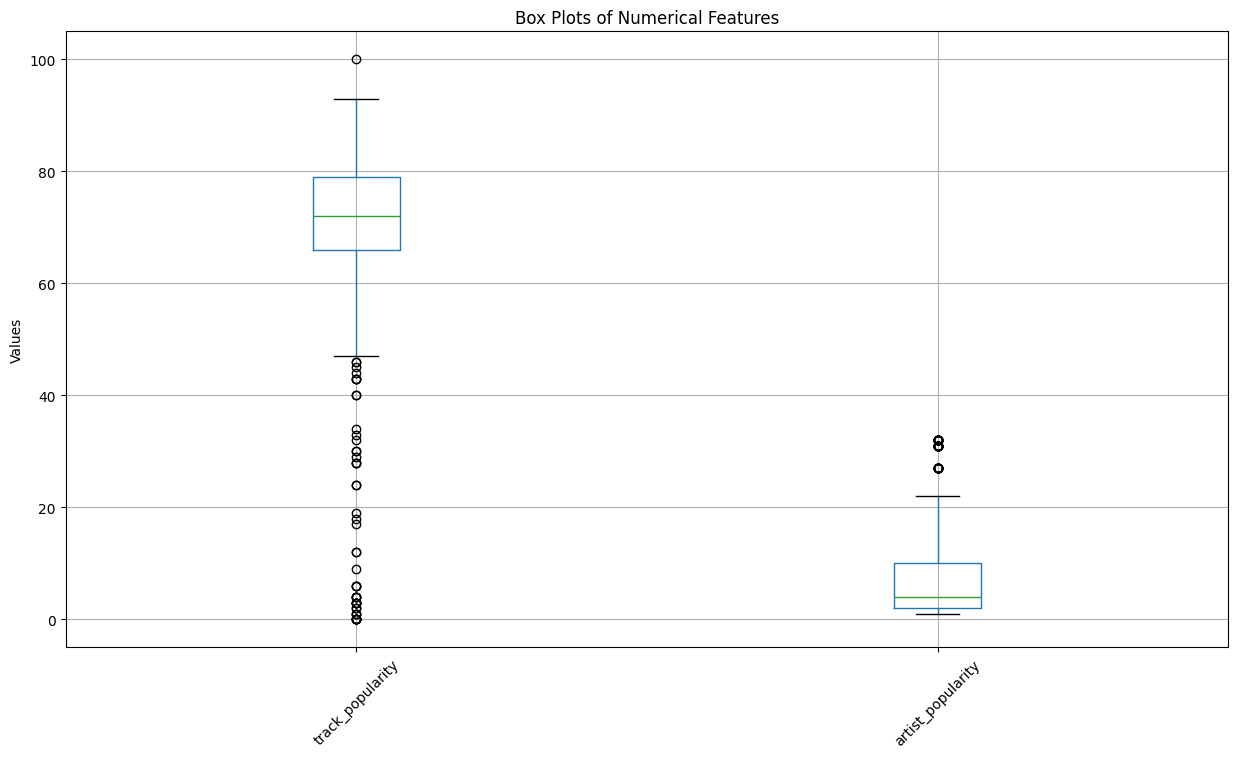

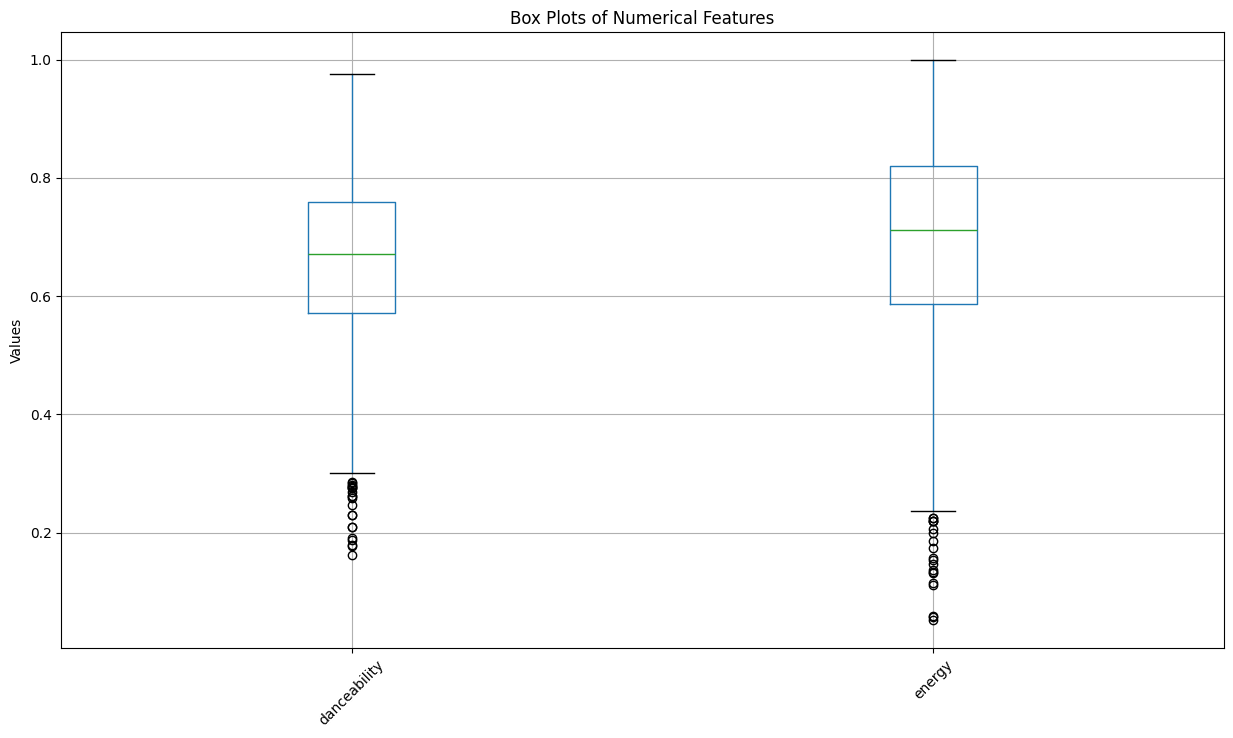

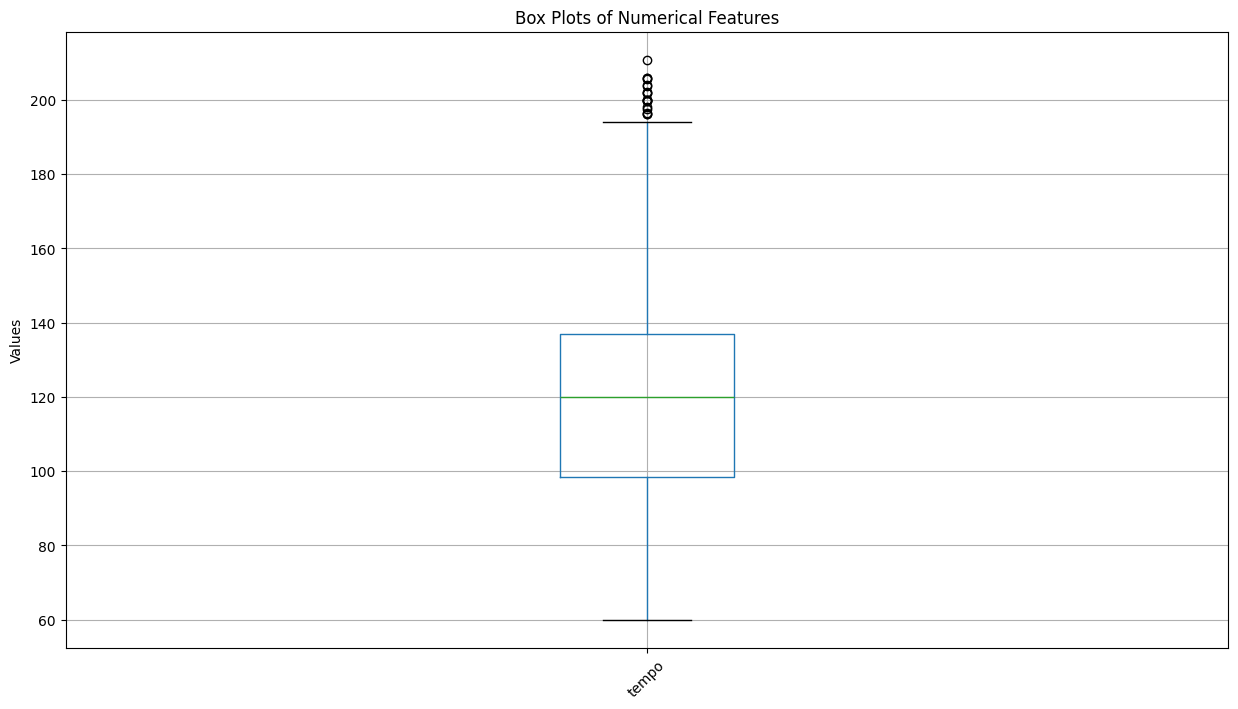

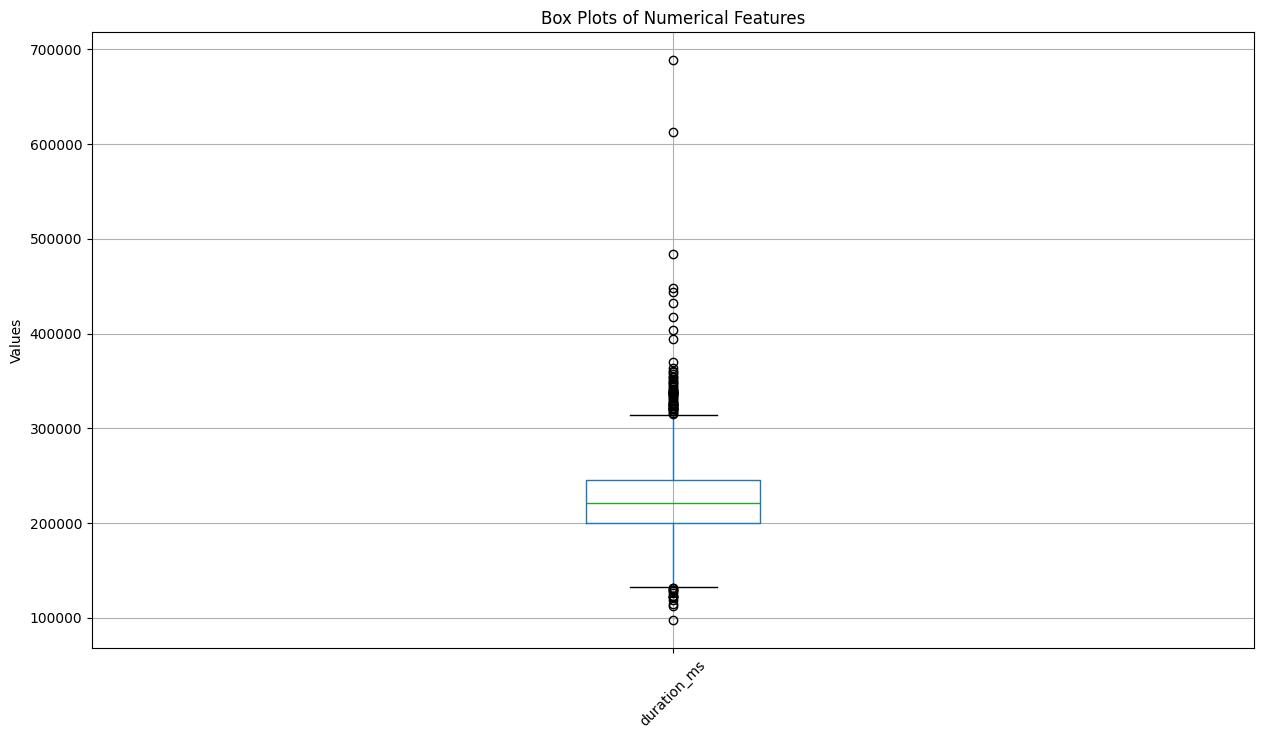

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

track_artist  = ['track_popularity', 'artist_popularity']
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

# Generar el boxplot
df[track_artist].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(track_artist, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

danc_ene  = ['danceability', 'energy']
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

# Generar el boxplot
df[danc_ene].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(danc_ene, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

tempo = ['tempo']
# Generar el boxplot
df[tempo].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(tempo, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

duration = ['duration_ms']
# Generar el boxplot
df[duration].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
# The error was in this line. Instead of using df[duration], you should use duration which is the list of labels.
ax.set_xticklabels(duration, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

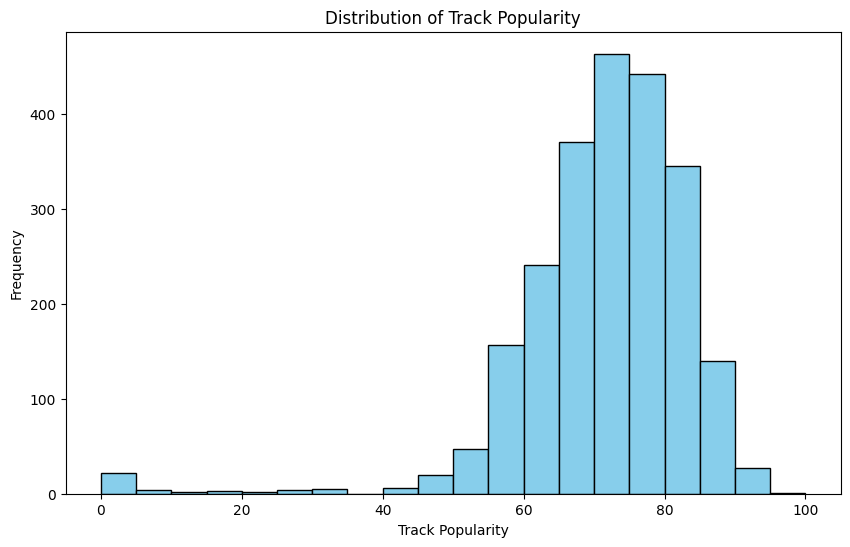

<ipython-input-14-1dff54230fc0>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



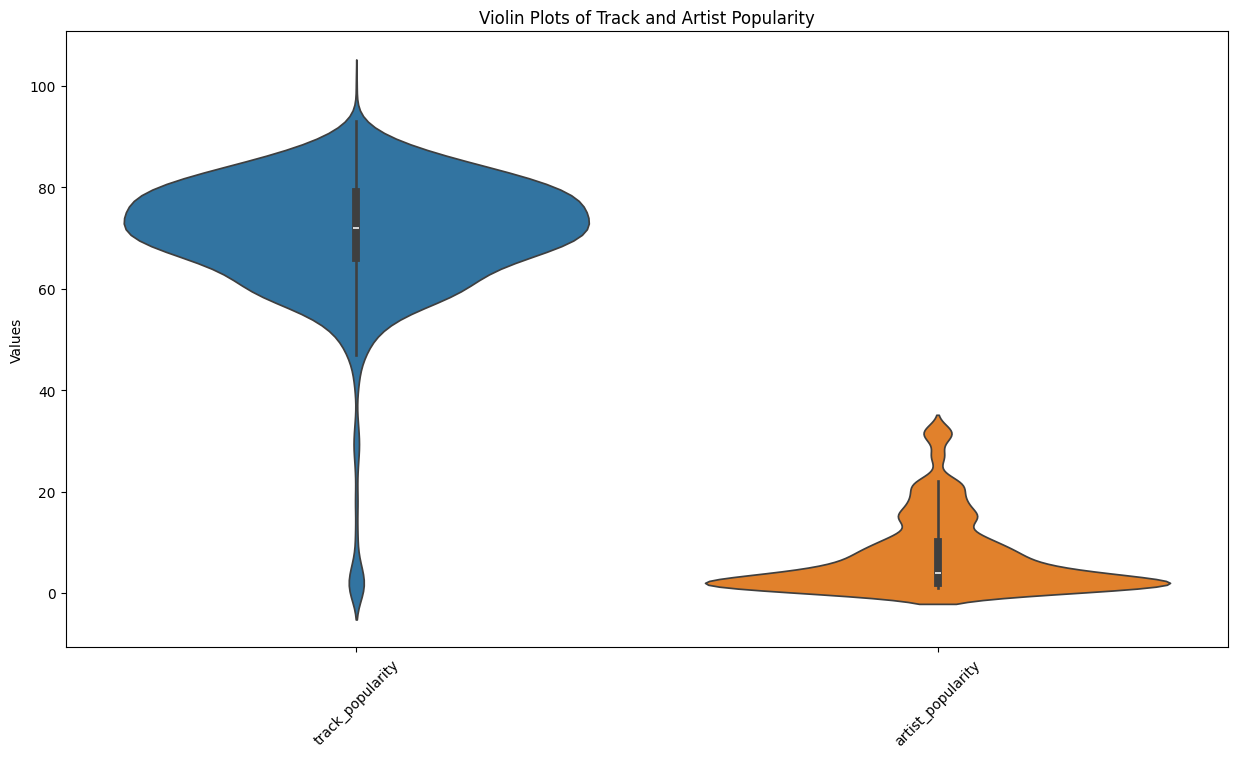

<ipython-input-14-1dff54230fc0>:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



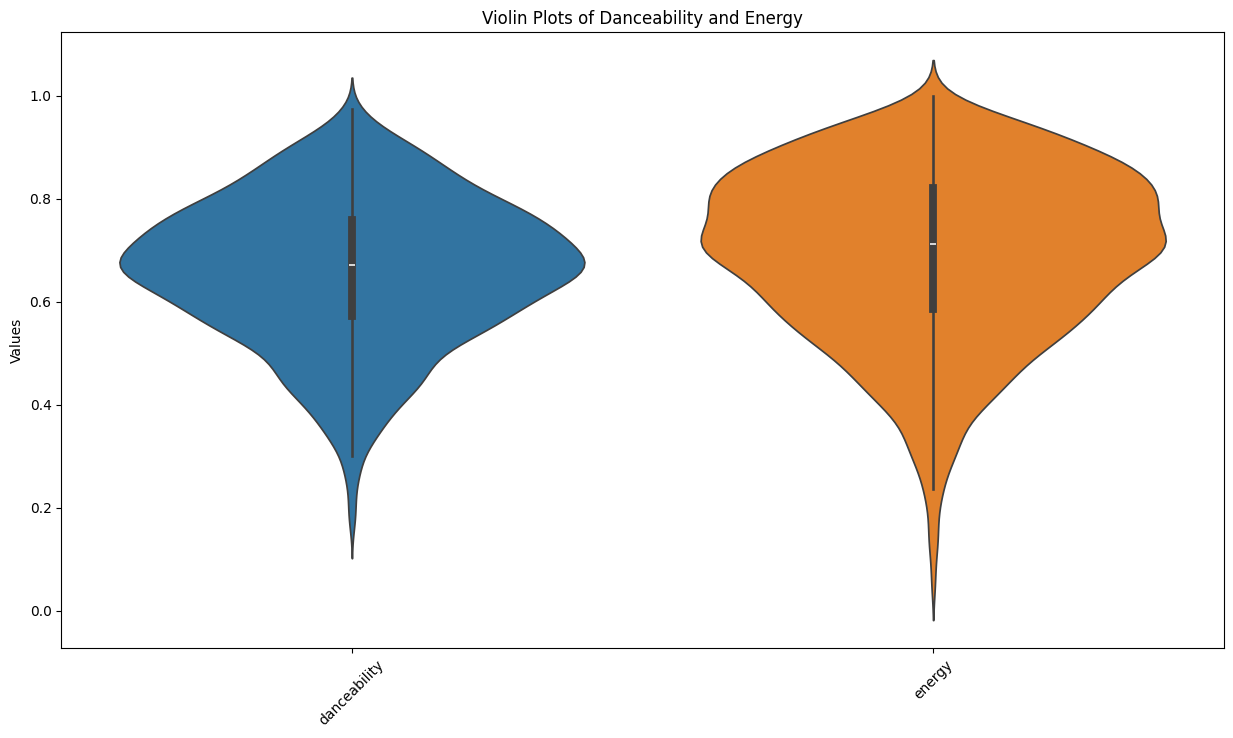

<ipython-input-14-1dff54230fc0>:37: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



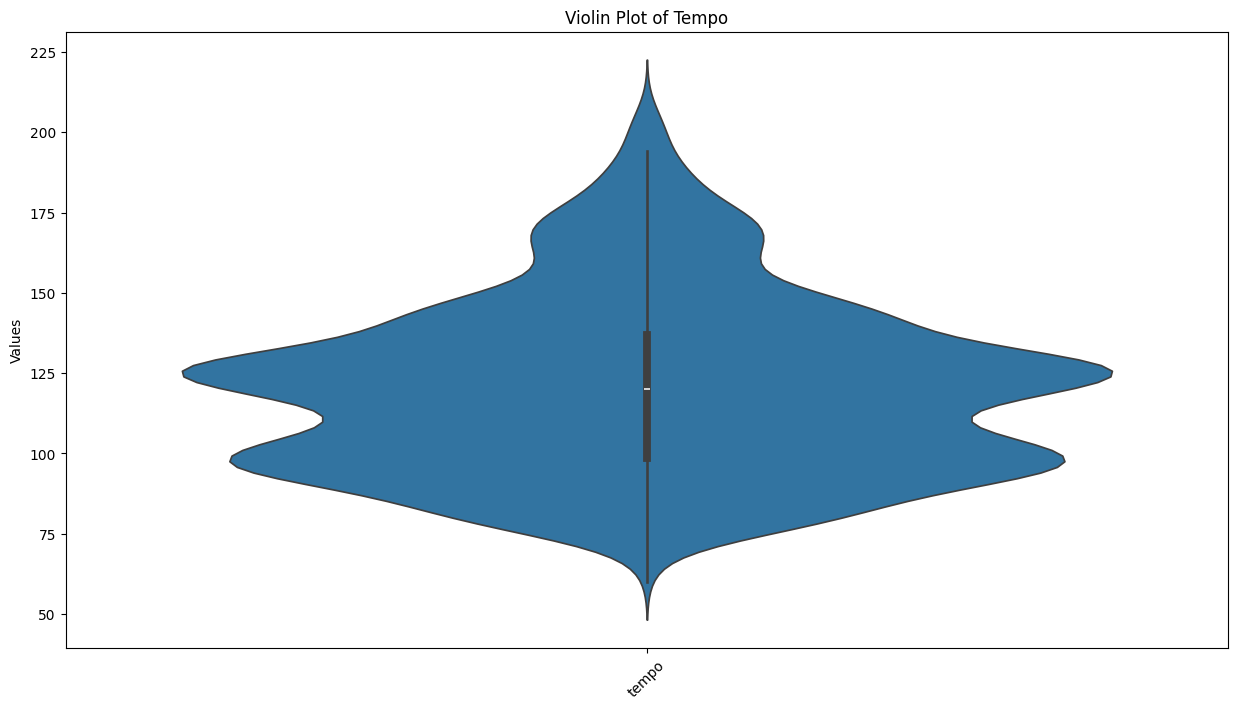

<ipython-input-14-1dff54230fc0>:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



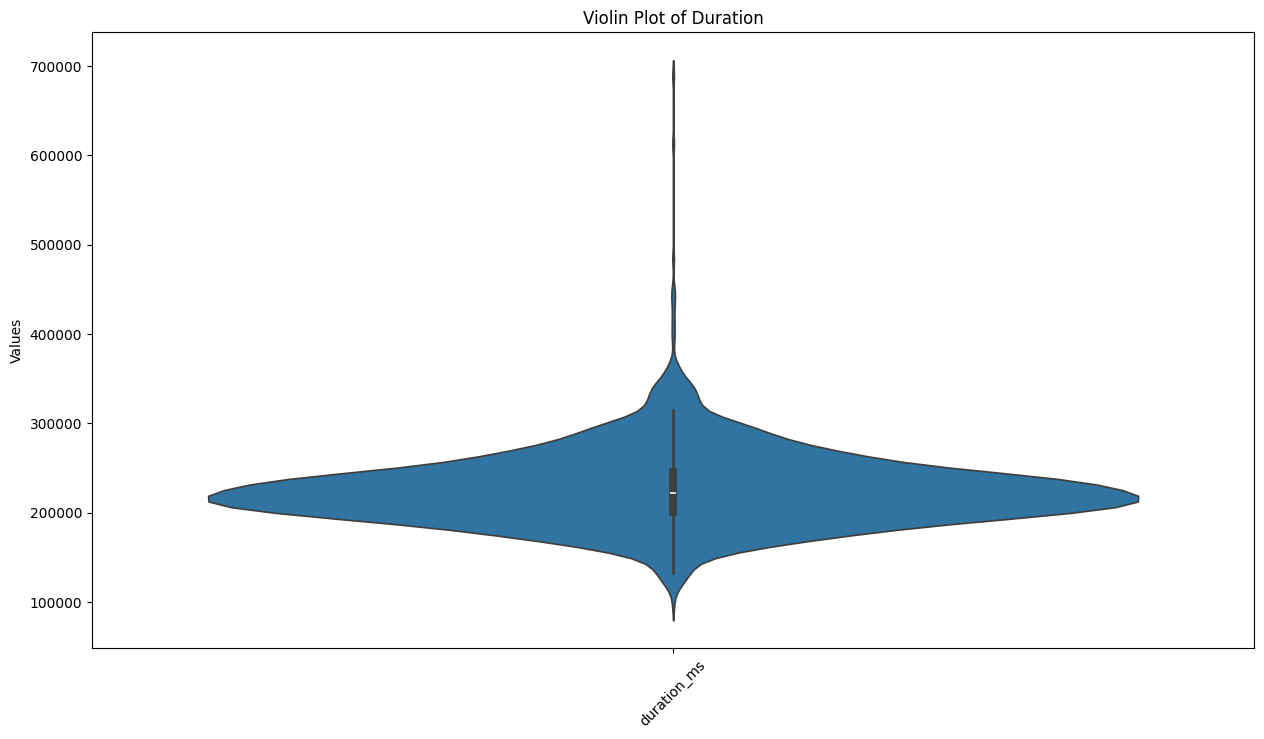

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

# Define feature groups
track_artist  = ['track_popularity', 'artist_popularity']
danc_ene  = ['danceability', 'energy']
tempo = ['tempo']
duration = ['duration_ms']

# Create violin plots for each feature group
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[track_artist], ax=ax)
ax.set_title('Violin Plots of Track and Artist Popularity')
ax.set_ylabel('Values')
ax.set_xticklabels(track_artist, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[danc_ene], ax=ax)
ax.set_title('Violin Plots of Danceability and Energy')
ax.set_ylabel('Values')
ax.set_xticklabels(danc_ene, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[tempo], ax=ax)
ax.set_title('Violin Plot of Tempo')
ax.set_ylabel('Values')
ax.set_xticklabels(tempo, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[duration], ax=ax)
ax.set_title('Violin Plot of Duration')
ax.set_ylabel('Values')
ax.set_xticklabels(duration, rotation=45)
plt.show()


danceability    energy   valence  acousticness  \
danceability          1.000000 -0.040575  0.409612     -0.105241   
energy               -0.040575  1.000000  0.388810     -0.543773   
valence               0.409612  0.388810  1.000000     -0.204592   
acousticness         -0.105241 -0.543773 -0.204592      1.000000   
instrumentalness      0.018217  0.009142 -0.029367      0.002361   
liveness             -0.084653  0.148944  0.034535     -0.095045   
speechiness           0.171114 -0.005981  0.101180     -0.037280   
tempo                -0.193770  0.125645 -0.020948     -0.094712   
track_popularity      0.006881 -0.074284 -0.067300      0.058311   

                  instrumentalness  liveness  speechiness     tempo  \
danceability              0.018217 -0.084653     0.171114 -0.193770   
energy                    0.009142  0.148944    -0.005981  0.125645   
valence                  -0.029367  0.034535     0.101180 -0.020948   
acousticness              0.002361 -0.095045    -0.037280 -0.094712   
instrumentalness          1.000000 -0.037942    -0.056315  0.024216   
liveness                 -0.037942  1.000000     0.066531  0.019186   
speechiness              -0.056315  0.066531     1.000000  0.066760   
tempo                     0.024216  0.019186     0.066760  1.000000   
track_popularity         -0.020854 -0.020033    -0.027161 -0.013565   

                  track_popularity  
danceability              0.006881  
energy                   -0.074284  
valence                  -0.067300  
acousticness              0.058311  
instrumentalness         -0.020854  
liveness                 -0.020033  
speechiness              -0.027161  
tempo                    -0.013565  
track_popularity          1.000000

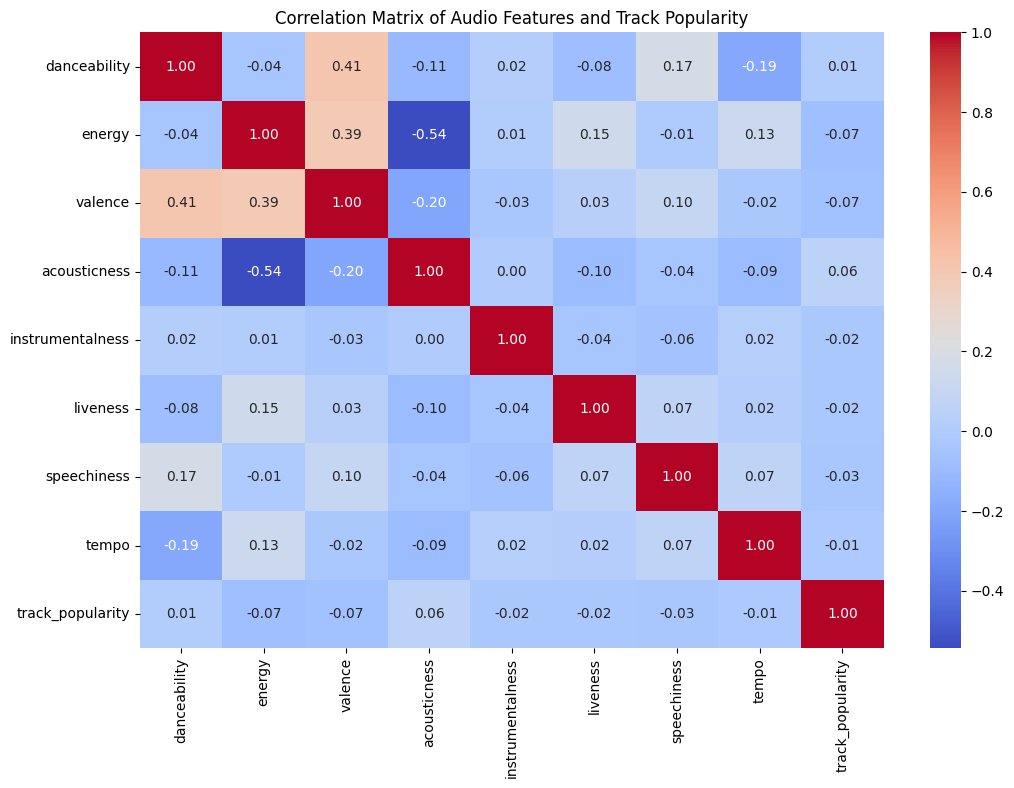

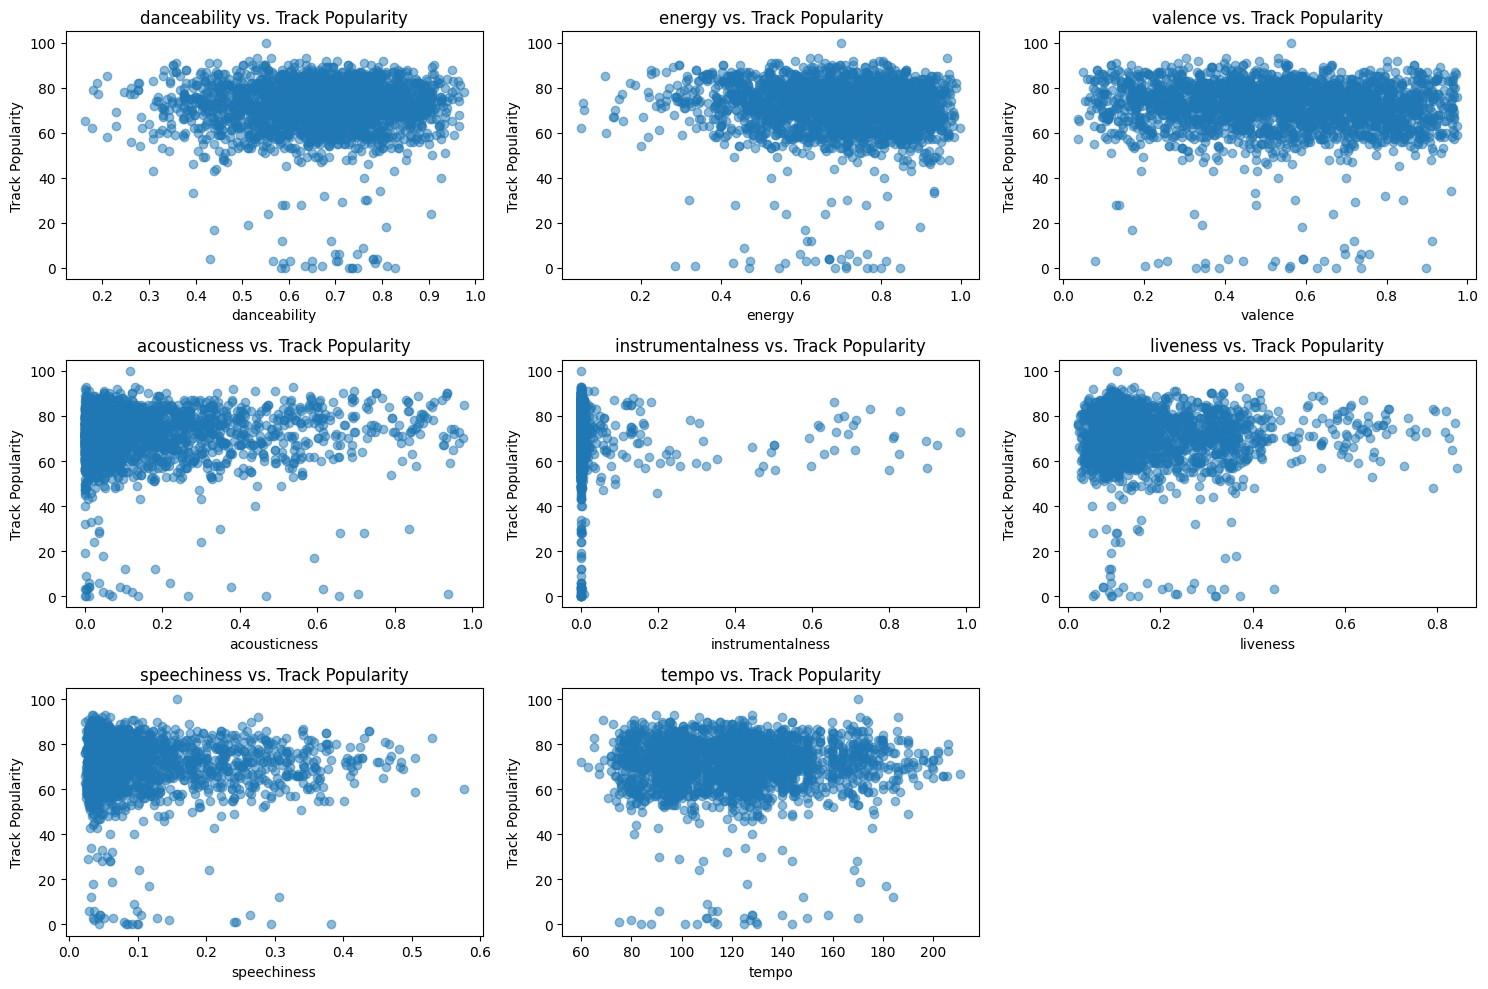

In [ ]:
# Calculate the distribution of audio features
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']
df[audio_features].describe()

# Calculate the correlation between audio features and track_popularity
correlation_matrix = df[audio_features + ['track_popularity']].corr()
display(correlation_matrix)

# Visualize the correlations using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features and Track Popularity')
plt.show()

# Explore the relationship between audio features and popularity with scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features):
  plt.subplot(3, 3, i + 1)
  plt.scatter(df[feature], df['track_popularity'], alpha=0.5)
  plt.xlabel(feature)
  plt.ylabel('Track Popularity')
  plt.title(f'{feature} vs. Track Popularity')
plt.tight_layout()
plt.show()

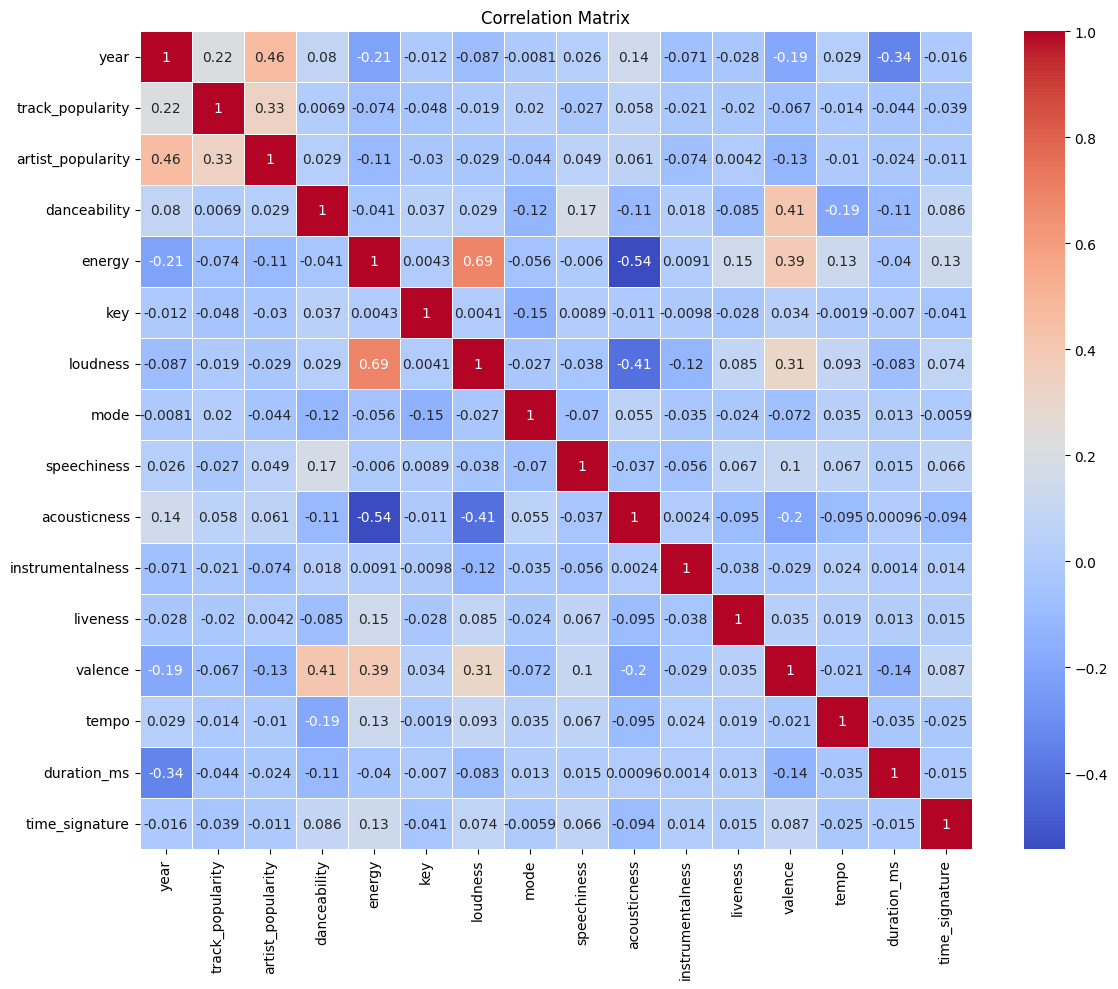

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **ING. Caracteristicas**    

In [3]:
# --- 3. Ingeniería de Características ---
print("\nCreando características de interacción y polinómicas...")
df['interaction_dance_energy'] = df['danceability'] * df['energy']
df['interaction_valence_energy'] = df['valence'] * df['energy']
df['interaction_loud_dance'] = df['loudness'] * df['danceability']
df['interaction_dance_valence'] = df['danceability'] * df['valence']
df['interaction_acoustic_energy'] = df['acousticness'] * df['energy']
df['danceability_sq'] = df['danceability'] ** 2
df['energy_sq'] = df['energy'] ** 2
df['loudness_sq'] = df['loudness'] ** 2
df['duration_s'] = df['duration_ms'] / 1000


Creando características de interacción y polinómicas...


# **Clasificación**

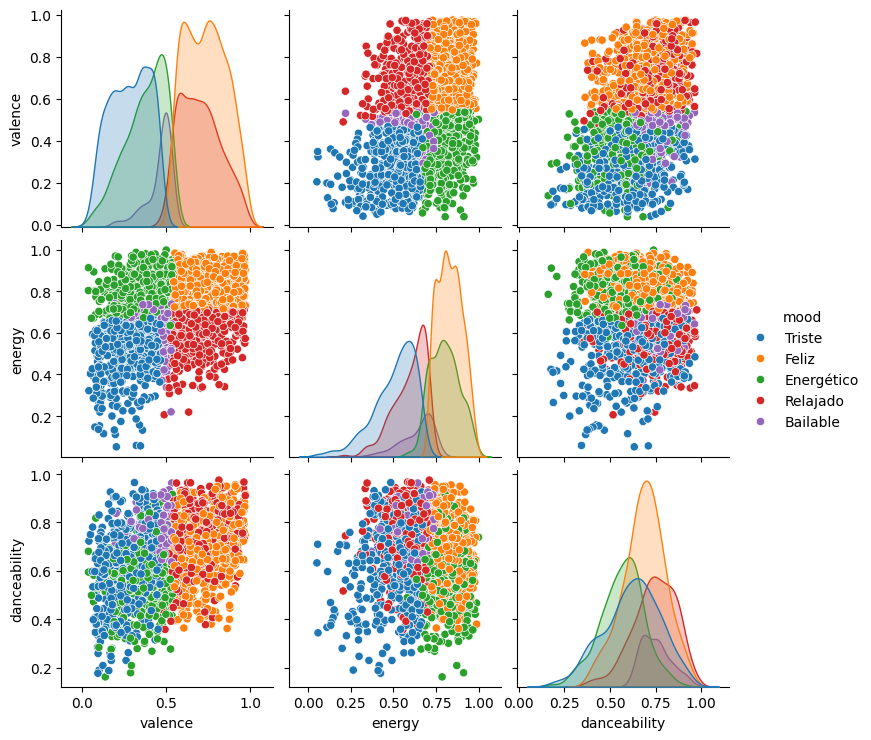

   artist_name        mood  valence  energy  danceability
0     Coldplay      Triste    0.285   0.661         0.429
1    blink-182       Feliz    0.684   0.897         0.434
2   Faith Hill      Triste    0.278   0.496         0.529
3  Linkin Park  Energético    0.400   0.864         0.556
4       *NSYNC       Feliz    0.861   0.926         0.610


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Constantes y parámetros

RANDOM_STATE = 42

def handle_missing_values(df, features, strategy='mean'):
    """ Rellena valores nulos con la estrategia indicada ('mean', 'median', 'drop'). """
    df_copy = df.copy()
    for feature in features:
        if df_copy[feature].isnull().any():
            if strategy == 'mean':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].mean())
            elif strategy == 'median':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].median())
            elif strategy == 'drop':
                df_copy.dropna(subset=[feature], inplace=True)
    return df_copy

def classify_flexible_with_backup(df):
    df_copy = df.copy()

    # Cuartiles
   # Incluye todos los percentiles necesarios
    val_q = df_copy['valence'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    en_q = df_copy['energy'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    da_q = df_copy['danceability'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])


    # Prototipos emocionales
    emotion_prototypes = {
        'Feliz':       np.array([0.8, 0.7, 0.5]),
        'Triste':      np.array([0.3, 0.3, 0.3]),
        'Relajado':    np.array([0.6, 0.4, 0.4]),
        'Energético':  np.array([0.4, 0.7, 0.5]),
        'Bailable':    np.array([0.5, 0.6, 0.8]),
    }

    def assign_mood(row):
          val, en, da = row['valence'], row['energy'], row['danceability']
          mood_scores = {}

          # Regla relajada
          if val >= val_q[0.5] and en >= en_q[0.5]:
              mood_scores['Feliz'] = mood_scores.get('Feliz', 0) + 1
          if val <= val_q[0.4] and en <= en_q[0.4]:
              mood_scores['Triste'] = mood_scores.get('Triste', 0) + 1
          if val >= val_q[0.5] and en <= en_q[0.5]:
              mood_scores['Relajado'] = mood_scores.get('Relajado', 0) + 1
          if en >= en_q[0.6]:
              mood_scores['Energético'] = mood_scores.get('Energético', 0) + 1
          if da >= da_q[0.6]:
              mood_scores['Bailable'] = mood_scores.get('Bailable', 0) + 1

          if mood_scores:
              return max(mood_scores, key=mood_scores.get)

          # Si no pasa reglas, usar distancia
          track_vector = np.array([val, en, da]).reshape(1, -1)
          distances = {
              mood: euclidean_distances(track_vector, proto.reshape(1, -1))[0][0]
              for mood, proto in emotion_prototypes.items()
          }
          return min(distances, key=distances.get)
    df_copy['mood'] = df_copy.apply(assign_mood, axis=1)
    return df_copy



def visualize_clusters(df, features, hue_col='mood'):
    """ Visualiza los clusters en un pairplot. """
    if df[hue_col].nunique() > 10:
        print("Demasiados clusters para una visualización clara.")
    sns.pairplot(df, hue=hue_col, vars=features)
    plt.show()

def classify_songs(df, n_clusters, features, nan_strategy='mean', visualize=True):
    """ Clasifica canciones en clusters de ánimo usando K-Means. """
    if df.empty or not all(feature in df.columns for feature in features):
        print("Error: DataFrame vacío o faltan características.")
        return None

    df_processed = handle_missing_values(df, features, nan_strategy)
    if df_processed.empty:
        return None

    X_scaled = StandardScaler().fit_transform(df_processed[features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    df_processed['mood_cluster'] = kmeans.fit_predict(X_scaled)

    df_classified = classify_flexible_with_backup(df_processed)

    if visualize:
        visualize_clusters(df_classified, features)

    return df_classified

# Ejemplo de uso
# Llamar a la función de clasificación

df_classified = classify_songs(df, n_clusters=5, features=['valence', 'energy', 'danceability'],visualize=True)

# Ver el resultado final
if df_classified is not None:
    print(df_classified[['artist_name','mood','valence', 'energy', 'danceability']].head())


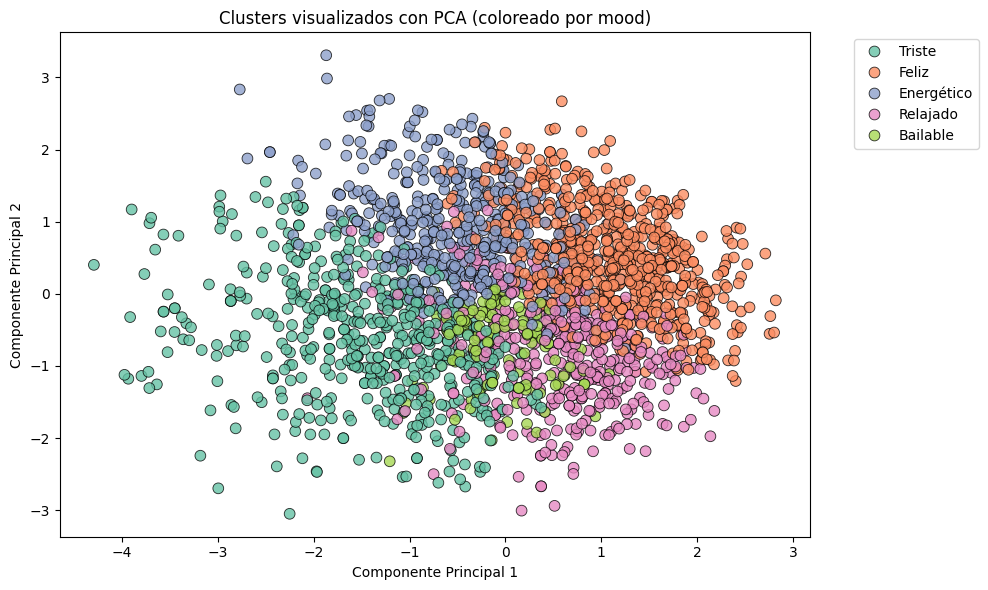

   artist_name        mood  valence  energy  danceability
0     Coldplay      Triste    0.285   0.661         0.429
1    blink-182       Feliz    0.684   0.897         0.434
2   Faith Hill      Triste    0.278   0.496         0.529
3  Linkin Park  Energético    0.400   0.864         0.556
4       *NSYNC       Feliz    0.861   0.926         0.610


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42

def handle_missing_values(df, features, strategy='mean'):
    df_copy = df.copy()
    for feature in features:
        if df_copy[feature].isnull().any():
            if strategy == 'mean':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].mean())
            elif strategy == 'median':
                df_copy[feature] = df_copy[feature].fillna(df_copy[feature].median())
            elif strategy == 'drop':
                df_copy.dropna(subset=[feature], inplace=True)
    return df_copy

def classify_flexible_with_backup(df):
    df_copy = df.copy()

    val_q = df_copy['valence'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    en_q = df_copy['energy'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])
    da_q = df_copy['danceability'].quantile([0.25, 0.4, 0.5, 0.6, 0.75])

    emotion_prototypes = {
        'Feliz':       np.array([0.8, 0.7, 0.5]),
        'Triste':      np.array([0.3, 0.3, 0.3]),
        'Relajado':    np.array([0.6, 0.4, 0.4]),
        'Energético':  np.array([0.4, 0.7, 0.5]),
        'Bailable':    np.array([0.5, 0.6, 0.8]),
    }

    def assign_mood(row):
        val, en, da = row['valence'], row['energy'], row['danceability']
        mood_scores = {}

        if val >= val_q[0.5] and en >= en_q[0.5]:
            mood_scores['Feliz'] = 1
        if val <= val_q[0.4] and en <= en_q[0.4]:
            mood_scores['Triste'] = 1
        if val >= val_q[0.5] and en <= en_q[0.5]:
            mood_scores['Relajado'] = 1
        if en >= en_q[0.6]:
            mood_scores['Energético'] = 1
        if da >= da_q[0.6]:
            mood_scores['Bailable'] = 1

        if mood_scores:
            return max(mood_scores, key=mood_scores.get)

        track_vector = np.array([val, en, da]).reshape(1, -1)
        distances = {
            mood: euclidean_distances(track_vector, proto.reshape(1, -1))[0][0]
            for mood, proto in emotion_prototypes.items()
        }
        return min(distances, key=distances.get)

    df_copy['mood'] = df_copy.apply(assign_mood, axis=1)
    return df_copy

def visualize_clusters(df, features, hue_col='mood'):
    X_scaled = StandardScaler().fit_transform(df[features])
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    df_plot = df.copy()
    df_plot['PCA1'] = components[:, 0]
    df_plot['PCA2'] = components[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='PCA1', y='PCA2',
        hue=hue_col,
        data=df_plot,
        palette='Set2',
        s=60,
        alpha=0.8,
        edgecolor='k'
    )
    plt.title(f'Clusters visualizados con PCA (coloreado por {hue_col})')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def classify_songs(df, n_clusters, features, nan_strategy='mean', visualize=True):
    if df.empty or not all(feature in df.columns for feature in features):
        print("Error: DataFrame vacío o faltan características.")
        return None

    df_processed = handle_missing_values(df, features, nan_strategy)
    if df_processed.empty:
        return None

    X_scaled = StandardScaler().fit_transform(df_processed[features])
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE)
    df_processed['mood_cluster'] = kmeans.fit_predict(X_scaled)

    df_classified = classify_flexible_with_backup(df_processed)

    if visualize:
        visualize_clusters(df_classified, features, hue_col='mood')  # También puedes cambiar a 'mood_cluster'

    return df_classified

# Ejemplo de uso
# df debe estar previamente cargado con las columnas valence, energy, danceability

# df = pd.read_csv('tu_dataset.csv')
df_classified = classify_songs(df, n_clusters=5, features=['valence', 'energy', 'danceability'])

if df_classified is not None:
    print(df_classified[['artist_name','mood','valence', 'energy', 'danceability']].head())


# **Regresión**

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin # Para el custom transformer

# --- Custom Transformer para IQR Capping ---
class IQROutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds_ = {}
        self.upper_bounds_ = {}
        self.columns_ = None

    def fit(self, X, y=None):
        # Asegurarse de que X es un DataFrame de pandas para facilitar el manejo de columnas
        if not isinstance(X, pd.DataFrame):
            X_df = pd.DataFrame(X)
        else:
            X_df = X.copy()

        self.columns_ = X_df.columns
        for col in self.columns_:
            if pd.api.types.is_numeric_dtype(X_df[col]): # Solo aplicar a columnas numéricas
                Q1 = X_df[col].quantile(0.25)
                Q3 = X_df[col].quantile(0.75)
                IQR = Q3 - Q1
                self.lower_bounds_[col] = Q1 - self.factor * IQR
                self.upper_bounds_[col] = Q3 + self.factor * IQR
            else: # Guardar información para columnas no numéricas para pasarlas sin cambios
                self.lower_bounds_[col] = None
                self.upper_bounds_[col] = None
        return self

    def transform(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X_df = pd.DataFrame(X, columns=self.columns_) # Asumir el mismo orden de columnas
        else:
            X_df = X.copy()

        for col in self.columns_:
            if self.lower_bounds_[col] is not None and self.upper_bounds_[col] is not None: # Si es una columna numérica fiteada
                X_df[col] = np.where(X_df[col] < self.lower_bounds_[col], self.lower_bounds_[col], X_df[col])
                X_df[col] = np.where(X_df[col] > self.upper_bounds_[col], self.upper_bounds_[col], X_df[col])
        return X_df.values # Devolver array de numpy como es costumbre en scikit-learn, o X_df si se prefiere DataFrame




--- Evaluación del Modelo (en datos de prueba <2022) ---
Error Cuadrático Medio (MSE): 146.9692
Raíz del Error Cuadrático Medio (RMSE): 12.1231
Error Absoluto Medio (MAE): 7.6064
Coeficiente de Determinación (R²): 0.0858


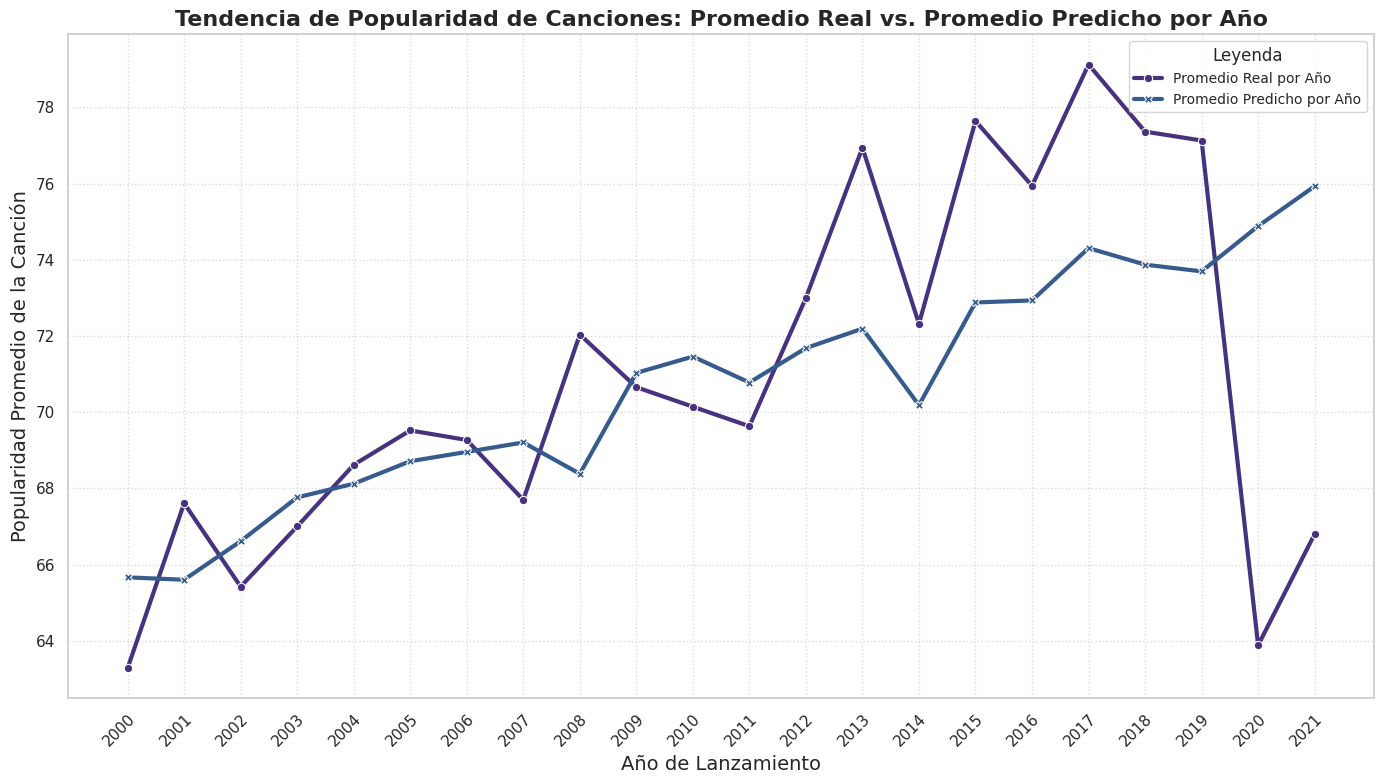


--- Realizando predicciones en datos de 2022 ---
Primeras 5 predicciones para 2022: [75.63156403 77.91637888 82.01916217 76.83745562 67.61071629]
las 5 primeras que tenmos: 2200    90
2201    88
2202    93
2203    87
2204    28
Name: track_popularity, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings


df.dropna(inplace=True)



df_2022 = df[df['year'] == 2022].copy()

df_train_val = df[df['year'] != 2022].copy()

# Definir características numéricas y categóricas
numerical_features = ['year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features

# Configuración de transformadores
# Crear transformadores de preprocesamiento
# Para características numéricas: escalado estándar
# Para características categóricas: One-Hot Encoding

numerical_transformer = Pipeline(steps=[
    ('capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantener otras columnas (como release_year si no se transforma)
)

# Definir el modelo
modelo_regresion = LinearRegression()

# Crear el pipeline completo: preprocesamiento + modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', modelo_regresion)])

X = df_train_val[features]
y = df_train_val['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# 4. Entrenamiento del Modelo
pipeline.fit(X_train, y_train)

# 5. Evaluación del Modelo (con el conjunto de prueba de df_train_val)
y_pred_test = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("\n--- Evaluación del Modelo (en datos de prueba <2022) ---")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")


# Aplicar un tema de Seaborn
sns.set_theme(style="whitegrid", palette="viridis")

X_to_plot_year = X_test['year']

fig, ax = plt.subplots(figsize=(14, 8)) # Ajustar tamaño para mejor visualización

# 1. Calcular la popularidad promedio real y predicha por año
df_plot_avg = pd.DataFrame({
    'year': X_to_plot_year,
    'Popularidad Real': y_test,
    'Popularidad Predicha': y_pred_test
})

# Agrupar y calcular promedios
avg_by_year = df_plot_avg.groupby('year').mean().reset_index()

# Transformar a formato largo para sns.lineplot con 'hue'
avg_by_year_melted = avg_by_year.melt(
    id_vars='year',
    value_vars=['Popularidad Real', 'Popularidad Predicha'],
    var_name='Tipo de Popularidad',
    value_name='Popularidad Promedio'
)
# Renombrar para la leyenda
avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
    'Popularidad Real': 'Promedio Real por Año',
    'Popularidad Predicha': 'Promedio Predicho por Año'
})


# 2. Line plot para los promedios usando hue
sns.lineplot(
    data=avg_by_year_melted,
    x='year',
    y='Popularidad Promedio',
    hue='Tipo de Popularidad',
    style='Tipo de Popularidad',
    markers=True,
    dashes=False,
    linewidth=3,
    ax=ax
)

# Título y etiquetas
ax.set_title('Tendencia de Popularidad de Canciones: Promedio Real vs. Promedio Predicho por Año', fontsize=16, weight='bold')
ax.set_xlabel('Año de Lanzamiento', fontsize=14)
ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=14)

# Ajustar los ticks del eje X
unique_years = sorted(X_to_plot_year.unique())
if len(unique_years) > 0:
    ax.set_xticks(unique_years)
    if len(unique_years) > 10:
         plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    else:
        plt.setp(ax.get_xticklabels(), rotation=0)

# Leyenda
ax.legend(title='Leyenda', title_fontsize='12', fontsize='10', loc='best', frameon=True)

ax.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


# --- Predicciones Finales con df_2022 (Ejemplo) ---
if not df_2022.empty:
    print("\n--- Realizando predicciones en datos de 2022 ---")
    missing_cols = [col for col in features if col not in df_2022.columns]
    if missing_cols:
        print(f"Faltan columnas en df_2022: {missing_cols}. No se pueden hacer predicciones.")
    else:
        X_final_test = df_2022[features]
        final_predictions = pipeline.predict(X_final_test)
        print(f"Primeras 5 predicciones para 2022: {final_predictions[:5]}")
        print(f"las 5 primeras que tenmos: {df_2022['track_popularity'][:5]}")
else:
    print("\nNo hay datos de 2022 para predicciones finales en este conjunto.")


Entrenando GridSearchCV (buscando grado y alpha para Ridge)...
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Mejores parámetros encontrados por GridSearchCV (grado y alpha para Ridge):
{'preprocessor__num__poly__degree': 1, 'regressor__alpha': 100.0}
Mejor R² (cross-validated en entrenamiento): 0.1175

--- Evaluación del Mejor Modelo de GridSearchCV (Ridge con grado y alpha óptimos) en el Conjunto de Prueba ---
Grado Polinómico Óptimo: 1
Alpha Óptimo para Ridge: 100.0
MSE en Test: 145.3875
RMSE en Test: 12.0577
MAE en Test: 7.5942
R² en Test: 0.0956


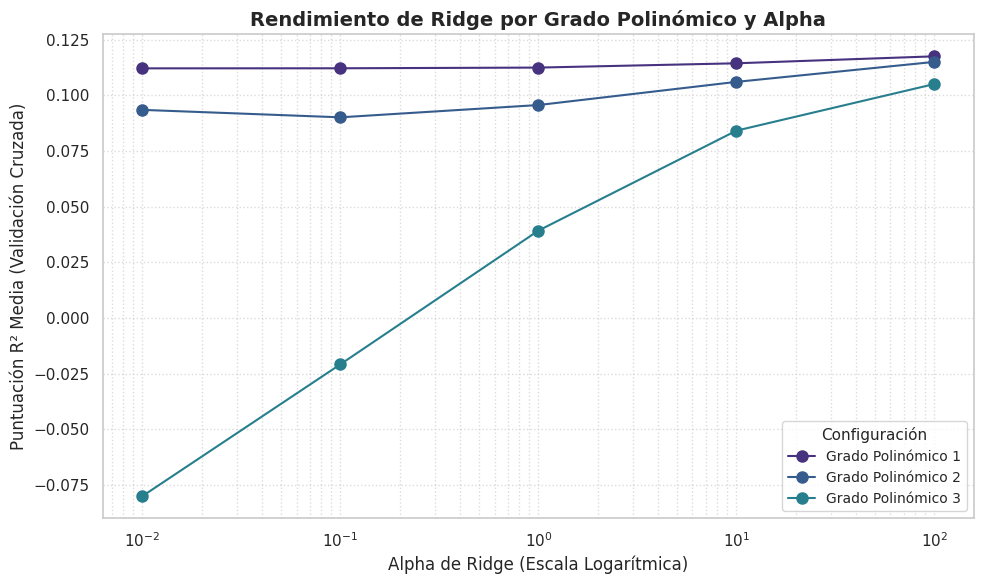


--- Gráfica de predicciones con el mejor modelo (Grado: 1, Alpha: 100.0) ---


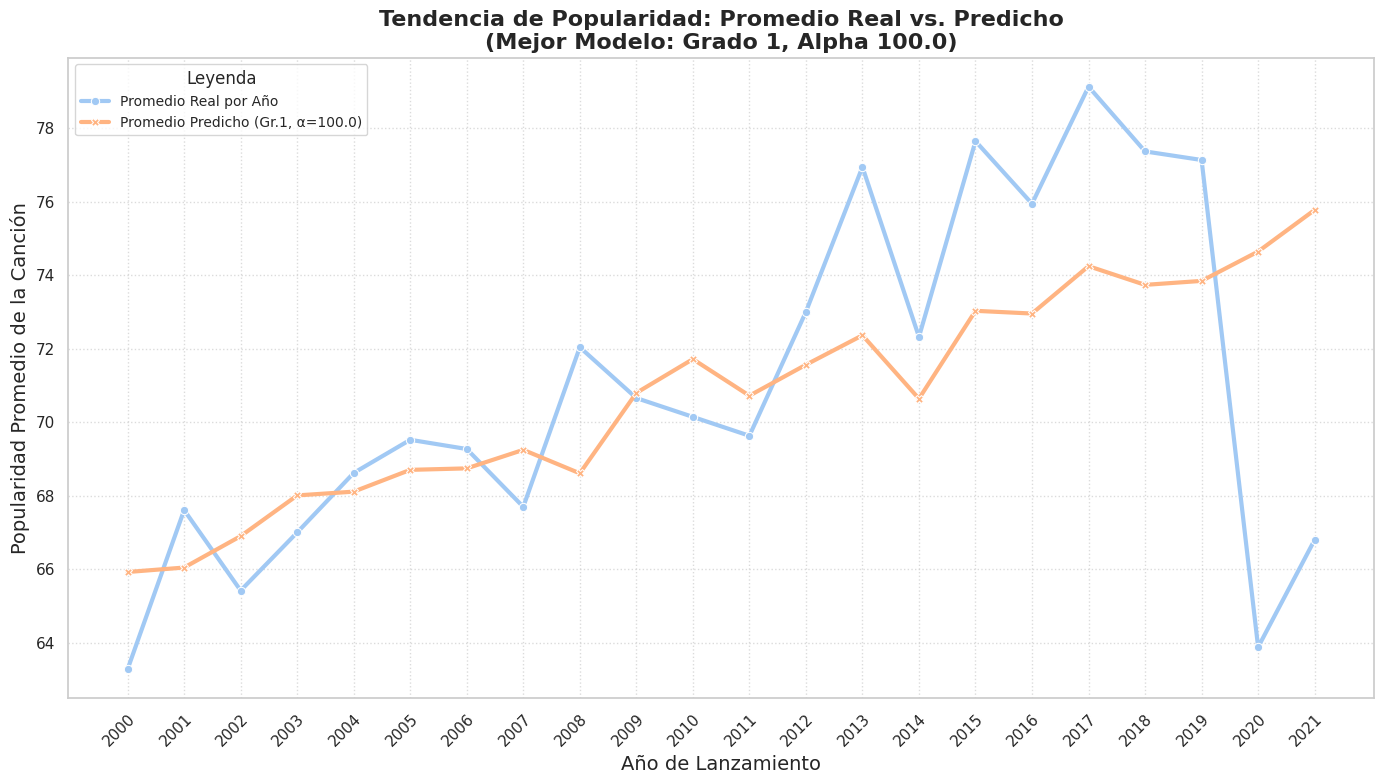

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
import warnings

# Suponiendo que 'df' ya está cargado y disponible
df.dropna(inplace=True)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()

# Definir características numéricas y categóricas
numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features


X = df_train_val[features]
y = df_train_val['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# 1. Definir el pipeline base
numerical_transformer_for_grid = SklearnPipeline(steps=[
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('poly', PolynomialFeatures(include_bias=False, interaction_only=False)),
    ('scaler', StandardScaler())
])

preprocessor_for_grid = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_for_grid, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline_for_grid = SklearnPipeline(steps=[
    ('preprocessor', preprocessor_for_grid),
    ('regressor', Ridge()) # CAMBIADO a Ridge()
])

# 2. Definir el espacio de búsqueda de hiperparámetros
#    Ahora incluye 'preprocessor__num__poly__degree' y 'regressor__alpha'
degrees_to_test = [1, 2, 3] # Rango reducido para demostración, puedes ampliarlo
alphas_to_test = [0.01, 0.1, 1.0, 10.0, 100.0] # Valores típicos para alpha

param_grid = {
    'preprocessor__num__poly__degree': degrees_to_test,
    'regressor__alpha': alphas_to_test
}

# 3. Configurar y ejecutar GridSearchCV
grid_search = GridSearchCV(estimator=pipeline_for_grid,
                           param_grid=param_grid,
                           cv=5, # Validación cruzada de 3 folds. Aumentar a 5 para más robustez.
                           scoring='r2', # Optimizar para R²
                           verbose=1,
                           n_jobs=-1)

print("Entrenando GridSearchCV (buscando grado y alpha para Ridge)...")
grid_search.fit(X_train, y_train)

# 4. Mostrar los mejores resultados de GridSearchCV
print("\nMejores parámetros encontrados por GridSearchCV (grado y alpha para Ridge):")
print(grid_search.best_params_)
print(f"Mejor R² (cross-validated en entrenamiento): {grid_search.best_score_:.4f}")

# 5. Evaluar el mejor modelo encontrado por GridSearchCV en el conjunto de prueba
best_model_from_grid = grid_search.best_estimator_
y_pred_test_grid = best_model_from_grid.predict(X_test)

mse_test_grid = mean_squared_error(y_test, y_pred_test_grid)
rmse_test_grid = np.sqrt(mse_test_grid)
r2_test_grid = r2_score(y_test, y_pred_test_grid)
mae_test_grid = mean_absolute_error(y_test, y_pred_test_grid)

print("\n--- Evaluación del Mejor Modelo de GridSearchCV (Ridge con grado y alpha óptimos) en el Conjunto de Prueba ---")
print(f"Grado Polinómico Óptimo: {grid_search.best_params_['preprocessor__num__poly__degree']}")
print(f"Alpha Óptimo para Ridge: {grid_search.best_params_['regressor__alpha']}")
print(f"MSE en Test: {mse_test_grid:.4f}")
print(f"RMSE en Test: {rmse_test_grid:.4f}")
print(f"MAE en Test: {mae_test_grid:.4f}")
print(f"R² en Test: {r2_test_grid:.4f}")

cv_results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6)) # Ajustado tamaño
sns.set_theme(style="whitegrid", palette="viridis") # Aplicar tema Seaborn

for degree in degrees_to_test:
    subset = cv_results_df[cv_results_df['param_preprocessor__num__poly__degree'] == degree]
    # Asegurarse que hay datos para graficar (puede que GridSearchCV no explore todos los grados si uno es muy malo)
    if not subset.empty:
        plt.plot(subset['param_regressor__alpha'],
                 subset['mean_test_score'],
                 marker='o',
                 linestyle='-',
                 markersize=8,
                 label=f'Grado Polinómico {degree}')

plt.xscale('log')
plt.xlabel('Alpha de Ridge (Escala Logarítmica)', fontsize=12)
plt.ylabel('Puntuación R² Media (Validación Cruzada)', fontsize=12)
plt.title('Rendimiento de Ridge por Grado Polinómico y Alpha', fontsize=14, weight='bold')
plt.legend(title='Configuración', fontsize=10, title_fontsize=11)
plt.grid(True, which="both", ls=":", alpha=0.7) # Ajuste de estilo de grid
plt.tight_layout()
plt.show()

# --- Gráfica de predicciones del mejor modelo (usando Seaborn) ---
if best_model_from_grid:
    best_degree_found = grid_search.best_params_.get('preprocessor__num__poly__degree', 'N/A (Grado 1 o no polinómico)')
    best_alpha_found = grid_search.best_params_['regressor__alpha']
    print(f"\n--- Gráfica de predicciones con el mejor modelo (Grado: {best_degree_found}, Alpha: {best_alpha_found}) ---")

    # Usar X_test original para obtener 'year' no transformado
    X_to_plot_year = X_test['year']

    fig, ax = plt.subplots(figsize=(14, 8))
    sns.set_theme(style="whitegrid", palette="pastel") # Tema para esta gráfica específica

    # Calcular promedios
    df_plot_avg = pd.DataFrame({
        'year': X_to_plot_year,
        'Popularidad Real': y_test,
        'Popularidad Predicha': y_pred_test_grid
    })
    avg_by_year = df_plot_avg.groupby('year').mean().reset_index()
    avg_by_year_melted = avg_by_year.melt(
        id_vars='year',
        value_vars=['Popularidad Real', 'Popularidad Predicha'],
        var_name='Tipo de Popularidad',
        value_name='Popularidad Promedio'
    )
    avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
        'Popularidad Real': 'Promedio Real por Año',
        'Popularidad Predicha': f'Promedio Predicho (Gr.{best_degree_found}, α={best_alpha_found})'
    })

    sns.lineplot(
        data=avg_by_year_melted,
        x='year',
        y='Popularidad Promedio',
        hue='Tipo de Popularidad',
        style='Tipo de Popularidad',
        markers=True,
        dashes=False,
        linewidth=3,
        ax=ax
    )

    ax.set_title(f'Tendencia de Popularidad: Promedio Real vs. Predicho\n(Mejor Modelo: Grado {best_degree_found}, Alpha {best_alpha_found})', fontsize=16, weight='bold')
    ax.set_xlabel('Año de Lanzamiento', fontsize=14)
    ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=14)

    unique_years = sorted(X_to_plot_year.unique())
    if len(unique_years) > 0:
        ax.set_xticks(unique_years)
        if len(unique_years) > 10:
             plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.legend(title='Leyenda', title_fontsize='12', fontsize='10', loc='best', frameon=True)
    ax.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

Entrenando GridSearchCV (buscando grado y alpha para Ridge)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Mejores parámetros para Ridge:
{'preprocessor__num__poly__degree': 1, 'preprocessor__num__scaler': StandardScaler(), 'regressor__alpha': 100.0}
Mejor R² (cross-validated): 0.1203

--- Evaluación del Mejor Modelo (Ridge) en Test ---
Grado Polinómico Óptimo: 1
Alpha Óptimo: 100.0
MSE: 159.6449
RMSE: 12.6351
MAE: 7.7123
R²: 0.0732


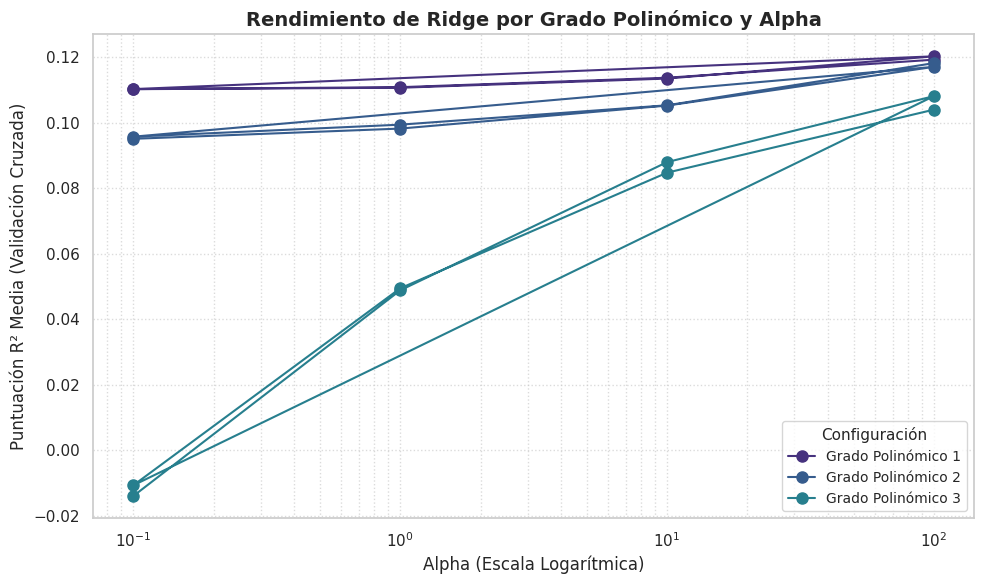


--- Gráfica de predicciones del mejor modelo (Ridge - Grado: 1, Alpha: 100.0000) ---


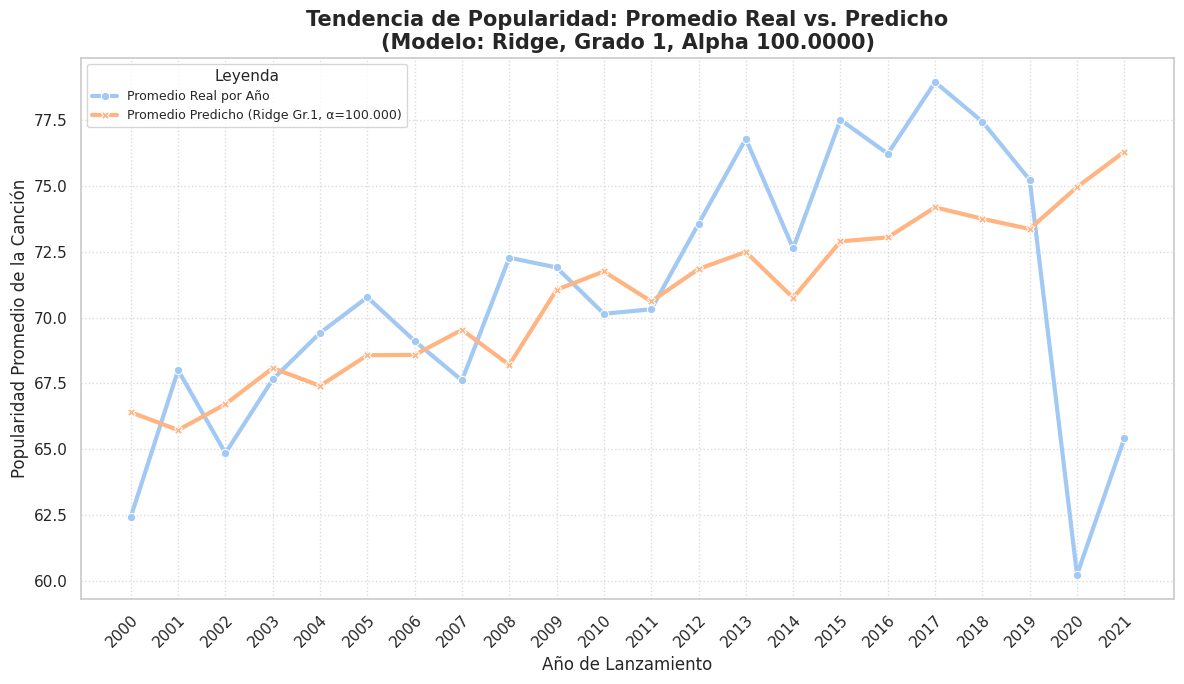

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso # O Ridge, o LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler # Añadido RobustScaler por si se considera después
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
import warnings

# Suponiendo que 'df' ya está cargado y disponible
df.dropna(inplace=True)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()

numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features


X = df_train_val[features]
y = df_train_val['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


REGRESSOR_TYPE = 'Ridge' # O 'Ridge'

if REGRESSOR_TYPE == 'Lasso':
    regressor_instance = Lasso(max_iter=10000) # Aumentar max_iter para Lasso puede ser necesario
    alphas_to_test = [0.001, 0.01, 0.1, 1.0]
elif REGRESSOR_TYPE == 'Ridge':
    regressor_instance = Ridge()
    alphas_to_test = [0.1, 1.0, 10.0, 100.0]
else:
    raise ValueError("Tipo de regresor no soportado. Elige 'Lasso' o 'Ridge'.")



numerical_transformer_for_grid = SklearnPipeline(steps=[
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('poly', PolynomialFeatures(include_bias=False, interaction_only=False)),
    ('scaler', StandardScaler()) # Podrías considerar RobustScaler aquí si quieres menos sensibilidad a outliers en el escalado
])

preprocessor_for_grid = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_for_grid, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Asegúrate de que el regresor aquí sea el que quieres probar (Lasso, Ridge)
pipeline_for_grid = SklearnPipeline(steps=[
    ('preprocessor', preprocessor_for_grid),
    ('regressor', regressor_instance) # O Ridge(max_iter=10000)
])

degrees_to_test = [1, 2, 3]
param_grid = {
    'preprocessor__num__poly__degree': degrees_to_test,
    'regressor__alpha': alphas_to_test,
    'preprocessor__num__scaler': [StandardScaler(), RobustScaler()]
}

grid_search = GridSearchCV(estimator=pipeline_for_grid,
                           param_grid=param_grid,
                           cv=3,
                           scoring='r2',
                           verbose=1,
                           n_jobs=1)

print(f"Entrenando GridSearchCV (buscando grado y alpha para {pipeline_for_grid.named_steps['regressor'].__class__.__name__})...")
# IMPORTANTE: Usar los datos winsorizados para el entrenamiento y evaluación
grid_search.fit(X_train, y_train)

# --- Resultados de GridSearchCV ---
print(f"\nMejores parámetros para {REGRESSOR_TYPE}:")
print(grid_search.best_params_)
print(f"Mejor R² (cross-validated): {grid_search.best_score_:.4f}")

best_model_from_grid = grid_search.best_estimator_
y_pred_test_grid = best_model_from_grid.predict(X_test)

mse_test_grid = mean_squared_error(y_test, y_pred_test_grid)
rmse_test_grid = np.sqrt(mse_test_grid)
r2_test_grid = r2_score(y_test, y_pred_test_grid)
mae_test_grid = mean_absolute_error(y_test, y_pred_test_grid)

print(f"\n--- Evaluación del Mejor Modelo ({REGRESSOR_TYPE}) en Test ---")
print(f"Grado Polinómico Óptimo: {grid_search.best_params_.get('preprocessor__num__poly__degree', 'N/A')}")
print(f"Alpha Óptimo: {grid_search.best_params_['regressor__alpha']}")
print(f"MSE: {mse_test_grid:.4f}")
print(f"RMSE: {rmse_test_grid:.4f}")
print(f"MAE: {mae_test_grid:.4f}")
print(f"R²: {r2_test_grid:.4f}")

if REGRESSOR_TYPE == 'Lasso':
    # Acceder a los coeficientes a través del paso 'regressor' del pipeline guardado
    final_lasso_model = best_model_from_grid.named_steps['regressor']
    if hasattr(final_lasso_model, 'coef_'):
        coefs = final_lasso_model.coef_
        n_selected_features = np.sum(np.abs(coefs) > 1e-6) # Considerar un umbral pequeño
        print(f"Características seleccionadas por Lasso: {n_selected_features} de {len(coefs)}")



# --- Sección de Gráfica de Todos los Resultados de GridSearchCV ---
cv_results_df = pd.DataFrame(grid_search.cv_results_)
sns.set_theme(style="whitegrid", palette="viridis")
plt.figure(figsize=(10, 6))

for degree in degrees_to_test:
    subset = cv_results_df[cv_results_df['param_preprocessor__num__poly__degree'] == degree]
    if not subset.empty:
        plt.plot(subset['param_regressor__alpha'],
                 subset['mean_test_score'],
                 marker='o', linestyle='-', markersize=8,
                 label=f'Grado Polinómico {degree}')

plt.xscale('log')
plt.xlabel('Alpha (Escala Logarítmica)', fontsize=12)
plt.ylabel('Puntuación R² Media (Validación Cruzada)', fontsize=12)
plt.title(f'Rendimiento de {REGRESSOR_TYPE} por Grado Polinómico y Alpha', fontsize=14, weight='bold')
plt.legend(title='Configuración', fontsize=10, title_fontsize=11)
plt.grid(True, which="both", ls=":", alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfica de predicciones con el mejor modelo (solo líneas de promedio) ---
if best_model_from_grid:
    best_degree_found = grid_search.best_params_.get('preprocessor__num__poly__degree', 'N/A')
    best_alpha_found = grid_search.best_params_['regressor__alpha']
    print(f"\n--- Gráfica de predicciones del mejor modelo ({REGRESSOR_TYPE} - Grado: {best_degree_found}, Alpha: {best_alpha_found:.4f}) ---")

    # Usar X_test['year'] ORIGINAL para el eje X de la gráfica
    X_to_plot_year = X_test['year']

    fig, ax = plt.subplots(figsize=(12, 7))
    sns.set_theme(style="whitegrid", palette="pastel") # Tema específico para esta gráfica

    df_plot_avg = pd.DataFrame({
        'year': X_to_plot_year,
        'Popularidad Real': y_test,
        'Popularidad Predicha': y_pred_test_grid
    })
    avg_by_year = df_plot_avg.groupby('year').mean().reset_index()
    avg_by_year_melted = avg_by_year.melt(
        id_vars='year',
        value_vars=['Popularidad Real', 'Popularidad Predicha'],
        var_name='Tipo de Popularidad',
        value_name='Popularidad Promedio'
    )
    pred_label = f'Promedio Predicho ({REGRESSOR_TYPE} Gr.{best_degree_found}, α={best_alpha_found:.3f})'
    avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
        'Popularidad Real': 'Promedio Real por Año',
        'Popularidad Predicha': pred_label
    })

    sns.lineplot(
        data=avg_by_year_melted, x='year', y='Popularidad Promedio',
        hue='Tipo de Popularidad', style='Tipo de Popularidad',
        markers=True, dashes=False, linewidth=3, ax=ax
    )

    ax.set_title(f'Tendencia de Popularidad: Promedio Real vs. Predicho\n(Modelo: {REGRESSOR_TYPE}, Grado {best_degree_found}, Alpha {best_alpha_found:.4f})', fontsize=15, weight='bold')
    ax.set_xlabel('Año de Lanzamiento', fontsize=12)
    ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=12)

    unique_years = sorted(X_to_plot_year.unique())
    if len(unique_years) > 0:
        ax.set_xticks(unique_years)
        if len(unique_years) > 10:
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.legend(title='Leyenda', title_fontsize='11', fontsize='9', loc='best', frameon=True)
    ax.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()


Entrenando modelo con PolynomialFeatures...

--- Evaluación del Modelo con PolynomialFeatures (en datos de prueba <2022) ---
Error Cuadrático Medio (MSE): 142.5206
Raíz del Error Cuadrático Medio (RMSE): 11.9382
Error Absoluto Medio (MAE): 7.7438
Coeficiente de Determinación (R²): 0.1134


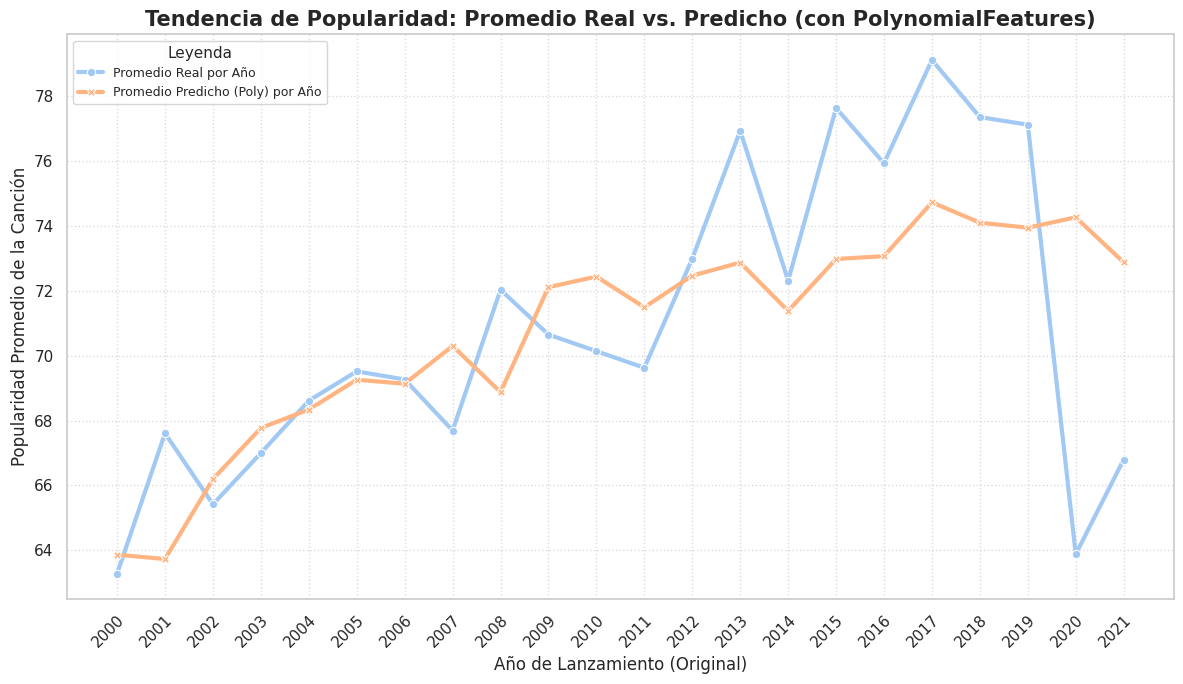

In [ ]:
import numpy as np
import pandas as pd # Asegúrate de importar pandas si df_plot_avg lo necesita
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline # Para el pipeline de transformación numérica
# from imblearn.pipeline import Pipeline # Lo mantienes si lo usas para otros fines, si no SklearnPipeline es suficiente
import warnings

# Suponiendo que 'df' ya está cargado y disponible
df.dropna(inplace=True)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()



# Definir características numéricas y categóricas
numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features

# --- Definición del preprocesador con PolynomialFeatures ---
# 1. Crear un pipeline para las transformaciones de características numéricas
#    Este pipeline aplicará PolynomialFeatures y luego StandardScaler
numerical_transformer_poly = SklearnPipeline(steps=[
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)), # Ajusta degree e interaction_only según necesidad
    ('scaler', StandardScaler())
])

# 2. Crear el ColumnTransformer usando el nuevo pipeline numérico
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_poly, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# --- Definir el modelo y el pipeline principal con PolynomialFeatures ---
modelo_regresion = LinearRegression() # Puedes probar otros regresores aquí también

# Crear el pipeline completo: preprocesamiento con poly + modelo
pipeline_poly = SklearnPipeline(steps=[('preprocessor', preprocessor_poly),
                                       ('regressor', modelo_regresion)])


X = df_train_val[features]
y = df_train_val['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Entrenamiento del Modelo con PolynomialFeatures
print("\nEntrenando modelo con PolynomialFeatures...")
pipeline_poly.fit(X_train, y_train)

# 5. Evaluación del Modelo (con el conjunto de prueba de df_train_val)
y_pred_test_poly = pipeline_poly.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_test_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_test_poly)
r2_poly = r2_score(y_test, y_pred_test_poly)

print("\n--- Evaluación del Modelo con PolynomialFeatures (en datos de prueba <2022) ---")
print(f"Error Cuadrático Medio (MSE): {mse_poly:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_poly:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_poly:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_poly:.4f}")


# --- Gráfica (usando las predicciones del modelo con PolynomialFeatures) ---
X_to_plot_year_original = X_test['year'] # Usar 'year' de los datos capados para consistencia

fig, ax = plt.subplots(figsize=(12, 7))
sns.set_theme(style="whitegrid", palette="pastel") # Aplicar tema Seaborn

# Preparar datos para graficar promedios
df_plot_avg = pd.DataFrame({
    'year': X_to_plot_year_original, # Año original
    'Popularidad Real': y_test,
    'Popularidad Predicha': y_pred_test_poly
})

avg_by_year = df_plot_avg.groupby('year').mean().reset_index()

avg_by_year_melted = avg_by_year.melt(
    id_vars='year',
    value_vars=['Popularidad Real', 'Popularidad Predicha'],
    var_name='Tipo de Popularidad',
    value_name='Popularidad Promedio'
)
avg_by_year_melted['Tipo de Popularidad'] = avg_by_year_melted['Tipo de Popularidad'].replace({
    'Popularidad Real': 'Promedio Real por Año',
    'Popularidad Predicha': 'Promedio Predicho (Poly) por Año'
})

sns.lineplot(
    data=avg_by_year_melted, x='year', y='Popularidad Promedio',
    hue='Tipo de Popularidad', style='Tipo de Popularidad',
    markers=True, dashes=False, linewidth=3, ax=ax
)

ax.set_title('Tendencia de Popularidad: Promedio Real vs. Predicho (con PolynomialFeatures)', fontsize=15, weight='bold')
ax.set_xlabel('Año de Lanzamiento (Original)', fontsize=12)
ax.set_ylabel('Popularidad Promedio de la Canción', fontsize=12)

unique_years = sorted(X_to_plot_year_original.unique())
if len(unique_years) > 0:
    ax.set_xticks(unique_years)
    if len(unique_years) > 10:
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.legend(title='Leyenda', title_fontsize='11', fontsize='9', loc='best', frameon=True)
ax.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

Shape of the DataFrame: (2299, 32)

Data Types of Columns:
 playlist_url                    object
year                             int64
track_id                        object
track_name                      object
track_popularity                 int64
album                           object
artist_id                       object
artist_name                     object
artist_genres                   object
artist_popularity                int64
danceability                   float64
energy                         float64
key                            float64
loudness                       float64
mode                           float64
speechiness                    float64
acousticness                   float64
instrumentalness               float64
liveness                       float64
valence                        float64
tempo                          float64
duration_ms                    float64
time_signature                 float64
interaction_dance_energy       float64
inte

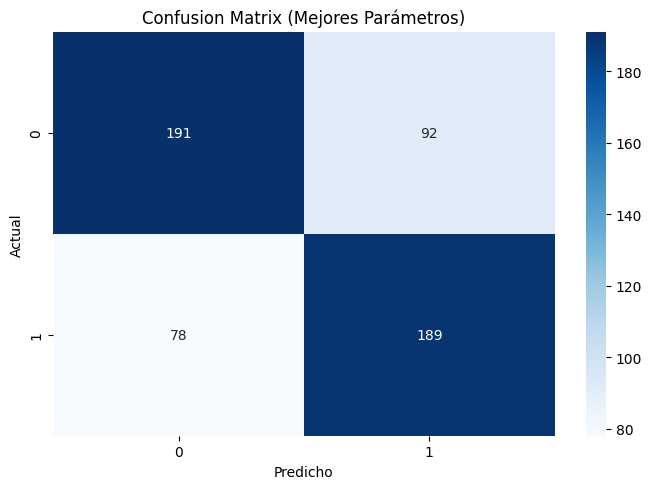


ROC AUC Score (with best params): 0.7631


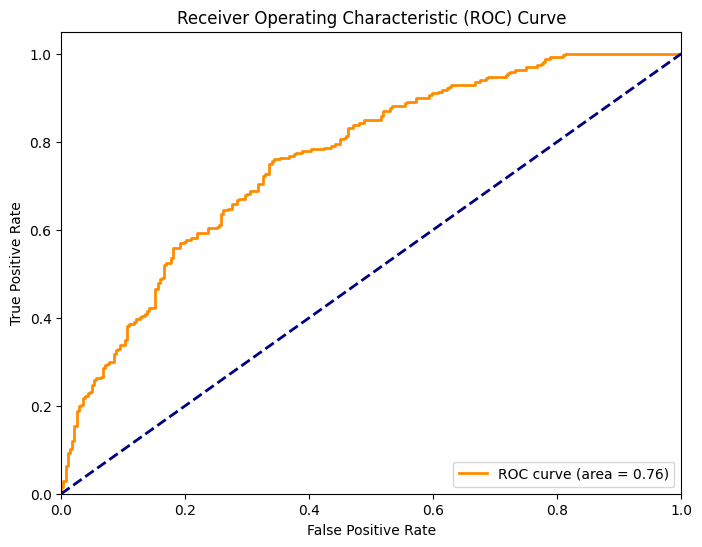


Número de características seleccionadas por RFE: 5
Error al intentar obtener nombres de características seleccionadas: Estimator iqr_capper does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve # Added more metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline as ImbPipeline # Good practice for combining steps
import matplotlib.pyplot as plt # For plotting ROC curve
# Import SMOTE
import seaborn as sns
from imblearn.over_sampling import SMOTE
# --- 1. Cargar y Preparar Datos ---

# Suponiendo que tus datos están en un DataFrame llamado 'df'
# Reemplaza esta parte con la carga real de tus datos si no están ya en un DataFrame
# Ejemplo: df = pd.read_csv('your_song_data.csv')
# O si ya lo tienes cargado, simplemente úsalo:
# df = tu_dataframe_existente

df.dropna(inplace=True)

print("Shape of the DataFrame:", df.shape)
print("\nData Types of Columns:\n", df.dtypes)

# Definir la variable objetivo binaria
df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()

popularity_threshold = df_train_val['track_popularity'].median()
df_train_val['is_popular'] = (df_train_val['track_popularity'] > popularity_threshold).astype(int)

# Seleccionar características (features)
# Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
# 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']

categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features
X = df_train_val[features]
y = df_train_val['is_popular']

# Separar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # stratify=y ayuda con el balance de clases

print("\nShape of X_train before capping:", X_train.shape)
print("Shape of X_test before capping:", X_test.shape)

# --- 4. Definición de Pipeline y Búsqueda de Hiperparámetros ---
# El pipeline ahora operará sobre los datos ya acotados (X_train_capped)

numerical_pipeline = ImbPipeline([
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Usar un Pipeline para combinar RFE, SMOTE, escalado y modelo
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced_subsample'))), # n_estimators reducido para RFE
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced_subsample'))
])

n_features_to_test_rfe = [10, 15, 20] # EJEMPLO: AJUSTAR
if X_train.shape[0] > 0 : # Solo si X_train no está vacío
    try:
        # Intento de estimar el número de features después del preprocesamiento
        # Es mejor calcularlo explícitamente una vez si es posible
        _temp_preprocessor = preprocessor.fit(X_train)
        _n_features_after_preprocessing = _temp_preprocessor.transform(X_train).shape[1]
        if _n_features_after_preprocessing > 0:
             n_features_to_test_rfe = [
                max(1,min(5, _n_features_after_preprocessing)), # Mínimo de 5 o total
                max(1,min(10, int(_n_features_after_preprocessing * 0.5))),
                max(1,min(15, int(_n_features_after_preprocessing * 0.75))),
                max(1,_n_features_after_preprocessing) # Todas las features
            ]
             n_features_to_test_rfe = sorted(list(set(n_features_to_test_rfe))) # Eliminar duplicados y ordenar
             n_features_to_test_rfe = [n for n in n_features_to_test_rfe if n > 0] # Asegurar que no sea cero
             if not n_features_to_test_rfe: n_features_to_test_rfe = [min(5, _n_features_after_preprocessing)]

        print(f"Estimación para 'rfe__n_features_to_select': {n_features_to_test_rfe} (basado en {_n_features_after_preprocessing} features post-preprocesamiento)")
    except Exception as e:
        print(f"No se pudo estimar n_features_to_select dinámicamente: {e}. Usando lista genérica: {n_features_to_test_rfe}")
else:
    print(f"X_train está vacío, usando lista genérica para n_features_to_test_rfe: {n_features_to_test_rfe}")

param_grid = {
    'rfe__n_features_to_select': n_features_to_test_rfe,
    'classifier__n_estimators': [100, 150], # Ajustado para rapidez
    'classifier__max_depth': [10, None],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 5],
    'smote__k_neighbors': [3, 7] # Hiperparámetro para SMOTE
}

grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1_weighted', n_jobs=-1, verbose=2) # cv reducido para rapidez

# Ajustar GridSearchCV a los datos de entrenamiento CAPPED
print("\nIniciando Hyperparameter Tuning con datos acotados...")
grid_search.fit(X_train, y_train)

print("\nHyperparameter Tuning Complete.")
print('Best parameters found by GridSearchCV:', grid_search.best_params_)
print('Best cross-validation score (F1):', grid_search.best_score_)
best_pipeline = grid_search.best_estimator_

# --- 6. Evaluación del Modelo ---
# Evaluar con los datos de prueba CAPPED
print("\nEvaluating the model with best parameters on capped test data...")
y_pred = best_pipeline.predict(X_test)
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy (with best params): {accuracy:.4f}")
print("\nClassification Report (with best params):\n", report)
print("\nConfusion Matrix (with best params):\n", conf_matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Mejores Parámetros)')
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print(f"\nROC AUC Score (with best params): {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# --- Información sobre Características Seleccionadas ---
if hasattr(best_pipeline.named_steps['rfe'], 'support_'):
    n_selected_by_rfe = best_pipeline.named_steps['rfe'].n_features_
    print(f"\nNúmero de características seleccionadas por RFE: {n_selected_by_rfe}")
    try:
        preprocessor_fitted = best_pipeline.named_steps['preprocessor']
        rfe_selector = best_pipeline.named_steps['rfe']
        if hasattr(preprocessor_fitted, 'get_feature_names_out'):
            feature_names_after_preprocessing = preprocessor_fitted.get_feature_names_out()
            selected_feature_names_by_rfe = feature_names_after_preprocessing[rfe_selector.support_]
            print(f"Nombres de las características seleccionadas ({len(selected_feature_names_by_rfe)}):")
            for i, name in enumerate(selected_feature_names_by_rfe):
                print(f"  {i+1}. {name}")
        else:
            print("No se pudieron obtener los nombres de las features procesadas (get_feature_names_out no disponible).")
    except Exception as e:
        print(f"Error al intentar obtener nombres de características seleccionadas: {e}")
else:
    print("\nEl paso RFE no se encontró o el atributo 'support_' está ausente.")

Shape of the DataFrame: (2299, 32)

Data Types of Columns:
 playlist_url                    object
year                             int64
track_id                        object
track_name                      object
track_popularity                 int64
album                           object
artist_id                       object
artist_name                     object
artist_genres                   object
artist_popularity                int64
danceability                   float64
energy                         float64
key                            float64
loudness                       float64
mode                           float64
speechiness                    float64
acousticness                   float64
instrumentalness               float64
liveness                       float64
valence                        float64
tempo                          float64
duration_ms                    float64
time_signature                 float64
interaction_dance_energy       float64
inte

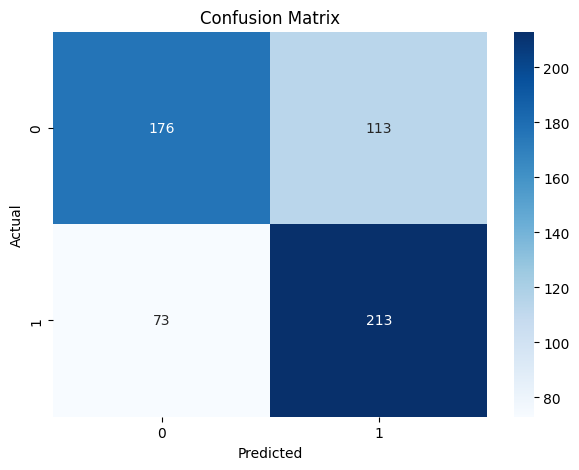


ROC AUC Score: 0.7410


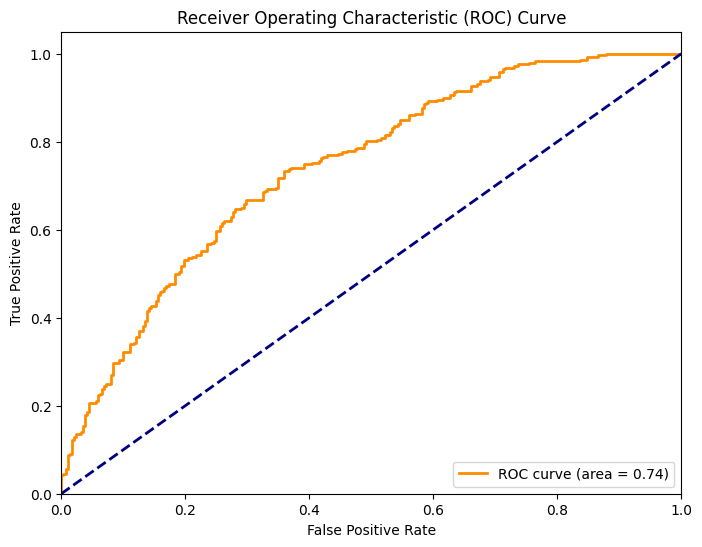

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Añadido OneHotEncoder
from sklearn.compose import ColumnTransformer # Necesario para preprocesamiento diferenciado
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin # Para transformador personalizado
import matplotlib.pyplot as plt
import seaborn as sns

print("Shape of the DataFrame:", df.shape)
print("\nData Types of Columns:\n", df.dtypes)

# Manejar valores nulos (muy importante en datos reales)
# En este ejemplo, no hay nulos generados, pero en datos reales deberías hacer:
# print("\nMissing values before handling:\n", df.isnull().sum())
# df.fillna(df.mean(numeric_only=True), inplace=True) # Imputar con la media (solo para columnas numéricas)
# O eliminar filas con nulos si son pocas: df.dropna(inplace=True)
# print("\nMissing values after handling:\n", df.isnull().sum())

df.dropna(inplace=True)

# Definir la variable objetivo binaria
# Podemos usar la mediana como umbral, o un percentil, o un valor fijo (ej. > 50 es popular)
popularity_threshold = df['track_popularity'].median()
# popularity_threshold = 50 # Alternativa: usar un valor fijo

df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)



# Seleccionar características (features)
# Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
# 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
numerical_features = [  'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity']
categorical_features = ['key','mode','time_signature']

features = numerical_features + categorical_features
X = df[features]
y = df['is_popular']

# Separar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

numerical_pipeline = Pipeline([
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])

preprocessor_ct = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', preprocessor_ct),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

# --- 2. Entrenamiento del Modelo ---
print("\nTraining the model (GradientBoostingClassifier) with capped data...")
pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Evaluación del Modelo ---
print("\nEvaluating the model with capped test data...")
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

print("\nConfusion Matrix:\n", conf_matrix)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') # Añadido sns.heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



Shape of the DataFrame: (2299, 33)

Data Types of Columns:
 playlist_url                    object
year                             int64
track_id                        object
track_name                      object
track_popularity                 int64
album                           object
artist_id                       object
artist_name                     object
artist_genres                   object
artist_popularity                int64
danceability                   float64
energy                         float64
key                            float64
loudness                       float64
mode                           float64
speechiness                    float64
acousticness                   float64
instrumentalness               float64
liveness                       float64
valence                        float64
tempo                          float64
duration_ms                    float64
time_signature                 float64
interaction_dance_energy       float64
inte

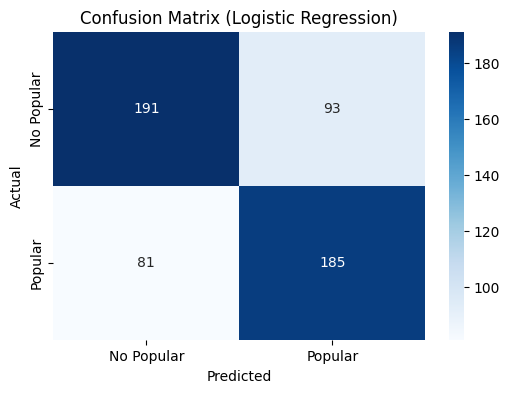


ROC AUC Score: 0.7432


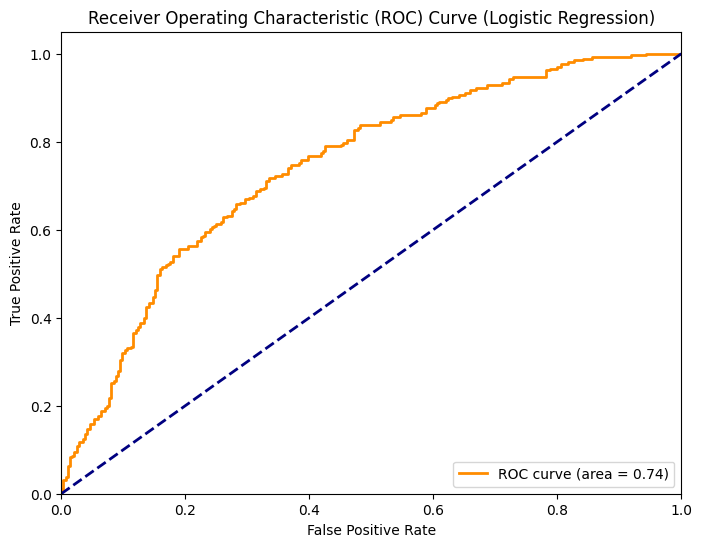

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
print("Shape of the DataFrame:", df.shape)
print("\nData Types of Columns:\n", df.dtypes)

# Manejar valores nulos (muy importante en datos reales)
# En este ejemplo, no hay nulos generados, pero en datos reales deberías hacer:
# print("\nMissing values before handling:\n", df.isnull().sum())
# df.fillna(df.mean(numeric_only=True), inplace=True) # Imputar con la media (solo para columnas numéricas)
# O eliminar filas con nulos si son pocas: df.dropna(inplace=True)
# print("\nMissing values after handling:\n", df.isnull().sum())

df.dropna(inplace=True)

popularity_threshold = df['track_popularity'].median()


df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()


# Seleccionar características (features)
# Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
# 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
num_features = [
    'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity'
]
categorical_features = ['key','mode','time_signature']
features = num_features + categorical_features

X = df_train_val[features]
y = df_train_val['is_popular']

# Separar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

print("\nShape of X_train before capping:", X_train.shape)
print("Shape of X_test before capping:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


numeric_pipeline = Pipeline([
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Usar un Pipeline para combinar escalado y modelo
# El pipeline ahora operará sobre los datos ya acotados (X_train_capped)
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)) # Aumentar max_iter si es necesario
])

# --- 2. Entrenamiento del Modelo ---
print("\nTraining the model (LogisticRegression) with capped data...")
pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Evaluación del Modelo ---
print("\nEvaluating the model with capped test data...")
y_pred = pipeline.predict(X_test) # <<<<<<< USAR DATOS ACOTADOS AQUÍ
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

print("\nConfusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6,4)) # Crear una figura antes de llamar a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

Shape of the DataFrame: (2299, 33)

Data Types of Columns:
 playlist_url                    object
year                             int64
track_id                        object
track_name                      object
track_popularity                 int64
album                           object
artist_id                       object
artist_name                     object
artist_genres                   object
artist_popularity                int64
danceability                   float64
energy                         float64
key                            float64
loudness                       float64
mode                           float64
speechiness                    float64
acousticness                   float64
instrumentalness               float64
liveness                       float64
valence                        float64
tempo                          float64
duration_ms                    float64
time_signature                 float64
interaction_dance_energy       float64
inte

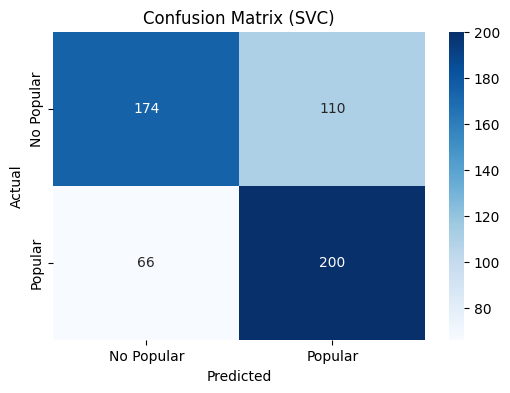


ROC AUC Score: 0.7400


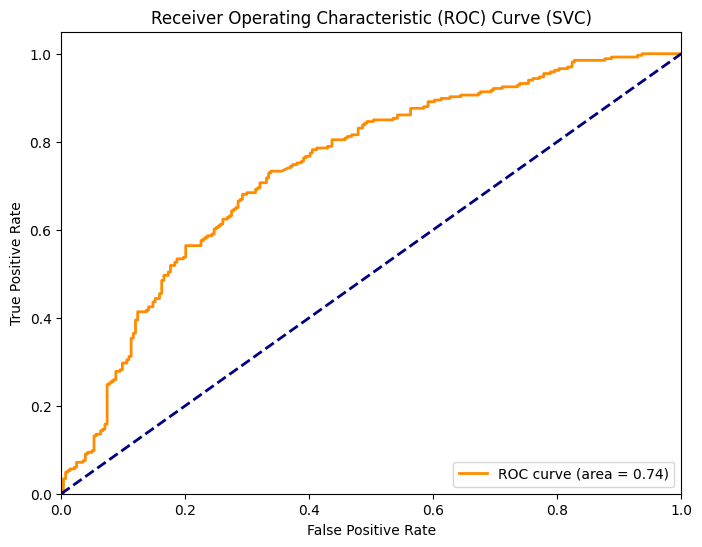

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Usando Support Vector Classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

print("Shape of the DataFrame:", df.shape)
print("\nData Types of Columns:\n", df.dtypes)

# Manejar valores nulos (muy importante en datos reales)
# En este ejemplo, no hay nulos generados, pero en datos reales deberías hacer:
# print("\nMissing values before handling:\n", df.isnull().sum())
# df.fillna(df.mean(numeric_only=True), inplace=True) # Imputar con la media (solo para columnas numéricas)
# O eliminar filas con nulos si son pocas: df.dropna(inplace=True)
# print("\nMissing values after handling:\n", df.isnull().sum())


# Definir la variable objetivo binaria
# Podemos usar la mediana como umbral, o un percentil, o un valor fijo (ej. > 50 es popular)
popularity_threshold = df['track_popularity'].median()
# popularity_threshold = 50 # Alternativa: usar un valor fijo

df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()


# Seleccionar características (features)
# Excluimos IDs, nombres, URL, popularidad original, y géneros por simplicidad inicial.
# 'year' podría ser relevante. 'artist_genres' necesitaría preprocesamiento (ej. One-Hot Encoding).
num_features = [
    'year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq','artist_popularity'
]
categorical_features = ['key','mode','time_signature']
features = num_features + categorical_features

X = df_train_val[features]
y = df_train_val['is_popular']


# Separar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=y ayuda con el balance de clases

print("\nShape of X_train before capping:", X_train.shape)
print("Shape of X_test before capping:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

numeric_pipeline = Pipeline([
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Usar un Pipeline para combinar escalado y modelo
# El pipeline ahora operará sobre los datos ya acotados (X_train_capped)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42, C=1.0, kernel='rbf'))
])

# --- 2. Entrenamiento del Modelo ---
print("\nTraining the model (SVC) with capped data...")
pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Evaluación del Modelo ---
print("\nEvaluating the model with capped test data...")
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)

print("\nConfusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6,4)) # Crear una figura antes de llamar a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Popular', 'Popular'], yticklabels=['No Popular', 'Popular'])
plt.title('Confusion Matrix (SVC)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVC)')
plt.legend(loc="lower right")
plt.show()

# **Red neuronal**


Aplicando preprocesamiento con Pipelines y ColumnTransformer...
Forma final de los datos de prueba procesados: (440, 28)
Dimensión de entrada para la red neuronal: 28


Model: "Modelo_Prediccion_Popularidad_Keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Capa_Oculta_1 (Dense)           │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_3 (Dense)           │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Oculta_4 (Dense)           │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Capa_Salida (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 576 (2.25 KB)


Iniciando entrenamiento del modelo...
Epoch 1/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 5218.4902 - mean_absolute_error: 71.3722 - val_loss: 5138.2729 - val_mean_absolute_error: 70.4678
Epoch 2/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4999.5249 - mean_absolute_error: 69.6806 - val_loss: 5060.6050 - val_mean_absolute_error: 69.9250
Epoch 3/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4888.4214 - mean_absolute_error: 68.9397 - val_loss: 4956.8125 - val_mean_absolute_error: 69.2029
Epoch 4/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4719.7822 - mean_absolute_error: 67.7903 - val_loss: 4837.6499 - val_mean_absolute_error: 68.3738
Epoch 5/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4494.5938 - mean_absolute_error: 66.1060 - val_loss: 4677.0859 - val_mean_absolute_error: 67.2463
Epoch 6/150
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4326.8301 - mean_absolute_error: 64.7141 - val_loss: 4476.0396 - val_mean_absolute_error: 65.8112
Epoch 7/150
55/

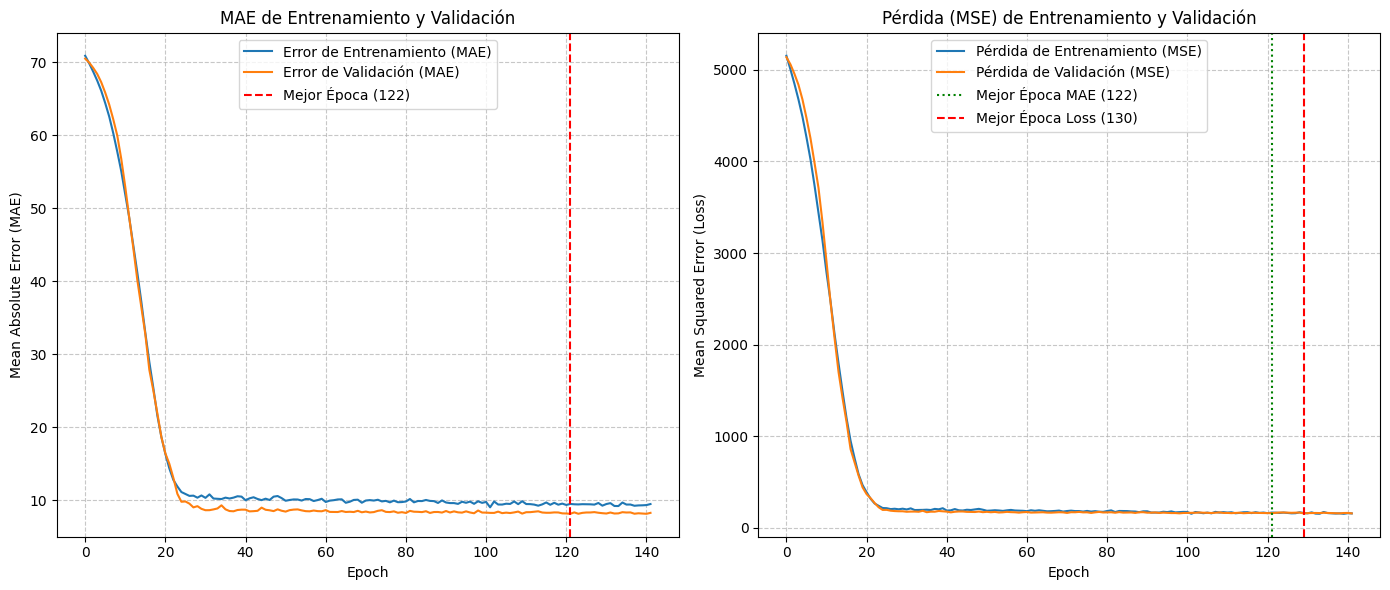


Generando gráfico de Tendencia de Popularidad por Año...
Preprocessing df_train_val for yearly trend plot...
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


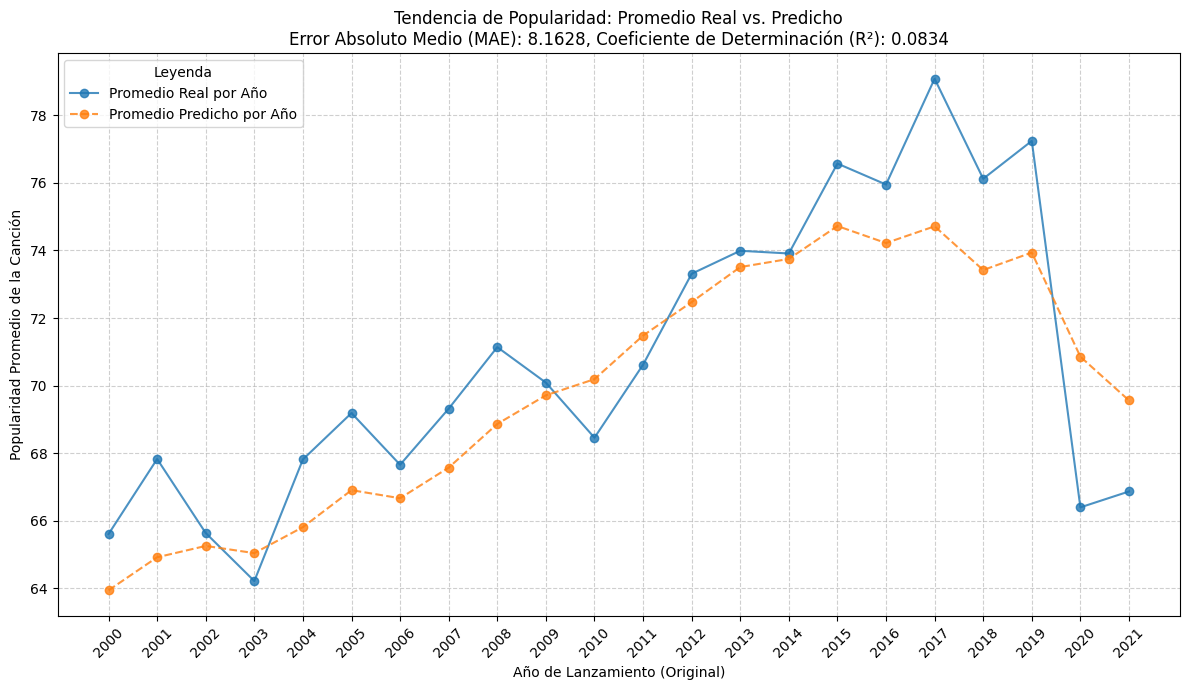


--- Realizando predicciones para 100 canciones de 2022 ---
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Primeras 5 predicciones para 2022:
      year  track_popularity  predicted_popularity
2200  2022                90             60.640633
2201  2022                88             60.074112
2202  2022                93             69.219681
2203  2022                87             77.403778
2204  2022                28             69.176407
R² Score en datos de 2022: -0.3095


In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin # Para el transformador personalizado
import matplotlib.pyplot as plt
# Asumiendo que tu DataFrame está cargado en la variable 'df'
# df = pd.read_csv('tu_archivo.csv') # O como hayas cargado tus datos

df.dropna(inplace=True)


# Selección de características (X) y objetivo (y)
target = 'track_popularity'

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()

numerical_features = ['year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq']
categorical_features = ['key', 'mode', 'time_signature']

features  = numerical_features + categorical_features

X = df_train_val[features]
y = df_train_val[target]

# --- 2. Dividir Datos ANTES de aplicar transformadores ---
# Es crucial dividir antes para evitar fuga de datos del conjunto de prueba al de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Definición de Pipelines de Preprocesamiento ---

# Pipeline para características numéricas
numeric_pipeline = Pipeline(steps=[
    ('iqr_capper', IQROutlierCapper(factor=1.5)), # Nuestro transformador personalizado
    ('scaler', StandardScaler())
])


# Combinar pipelines usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)
print("\nAplicando preprocesamiento con Pipelines y ColumnTransformer...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Obtener la forma de entrada después del preprocesamiento (especialmente OHE puede cambiar el número de columnas)
input_shape_dim = X_train_processed.shape[1]

print(f"Forma final de los datos de prueba procesados: {X_test_processed.shape}")
print(f"Dimensión de entrada para la red neuronal: {input_shape_dim}")

# --- 5. Construir Modelo ---
l1_factor = 0.0005

model = keras.Sequential(
    [
        layers.Input(shape=(input_shape_dim,), name='Capa_Entrada'),
        layers.Dense(128, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_1'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_2'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_3'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(32, kernel_regularizer=keras.regularizers.L1(l1_factor), name='Capa_Oculta_4'),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='linear', name='Capa_Salida')
    ],
    name="Modelo_Prediccion_Popularidad_Keras"
)
model.summary()

optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer_adam,
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# --- 6. Entrenar Modelo ---
print("\nIniciando entrenamiento del modelo...")

# Callback para Early Stopping

early_stopping_callback = EarlyStopping(
    monitor='val_mean_absolute_error',
    patience=20,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    X_train_processed,
    y_train.astype(np.float32),
    epochs=150,
    batch_size=32,
    validation_data=(X_test_processed,y_test.astype(np.float32)),
    callbacks=[early_stopping_callback],# Asegurar que y_test es float32
    verbose=1
)
print("Entrenamiento completado.")

# --- 7. Evaluar Modelo ---
print("\nEvaluando el modelo en el conjunto de prueba...")
results = model.evaluate(X_test_processed, y_test, verbose=0)
test_mse = results[0]
test_mae = results[1]
print(f"Pérdida en prueba (MSE): {test_mse:.4f}")
print(f"Error Absoluto Medio (MAE) en prueba: {test_mae:.4f}")
print(f"(En promedio, las predicciones se desvían en {test_mae:.2f} puntos de la popularidad real)")


# --- 8. (Opcional) Hacer Predicciones ---
predictions = model.predict(X_test_processed)

test_r2 = r2_score(y_test, predictions)
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

# --- 9. (Opcional) Visualizar historial de entrenamiento ---
def plot_history(history_obj, best_epoch_metric='val_mean_absolute_error'):
    hist = pd.DataFrame(history_obj.history)
    hist['epoch'] = history_obj.epoch

    best_epoch_val = np.nan
    if best_epoch_metric in hist and not hist[best_epoch_metric].empty:
        best_epoch_idx = hist[best_epoch_metric].idxmin()
        best_epoch_val = hist.loc[best_epoch_idx, 'epoch']
        print(f"Mejor época (según {best_epoch_metric}, índice {best_epoch_idx}): {int(best_epoch_val) + 1}")

    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Error de Entrenamiento (MAE)')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Error de Validación (MAE)')
    if not np.isnan(best_epoch_val) and best_epoch_metric == 'val_mean_absolute_error':
        plt.axvline(x=best_epoch_val, color='r', linestyle='--', label=f'Mejor Época ({int(best_epoch_val)+1})')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('MAE de Entrenamiento y Validación')

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error (Loss)')
    plt.plot(hist['epoch'], hist['loss'], label='Pérdida de Entrenamiento (MSE)')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Pérdida de Validación (MSE)')

    best_epoch_loss_val = np.nan # Para la gráfica de pérdida
    if 'val_loss' in hist and not hist['val_loss'].empty:
        best_epoch_loss_idx = hist['val_loss'].idxmin()
        best_epoch_loss_val = hist.loc[best_epoch_loss_idx, 'epoch']
        # Solo marcar la mejor época de loss si es diferente de la de MAE, o si MAE no se usó para early stopping
        if best_epoch_metric != 'val_loss' and not np.isnan(best_epoch_val):
             plt.axvline(x=best_epoch_val, color='g', linestyle=':', label=f'Mejor Época MAE ({int(best_epoch_val)+1})')
        plt.axvline(x=best_epoch_loss_val, color='r', linestyle='--', label=f'Mejor Época Loss ({int(best_epoch_loss_val)+1})')

    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.title('Pérdida (MSE) de Entrenamiento y Validación')
    plt.tight_layout()
    plt.show()

plot_history(history)

# --- 10. Graficar Tendencia de Popularidad por Año (Estilo Imagen) ---
print("\nGenerando gráfico de Tendencia de Popularidad por Año...")

# Make predictions on the entire df_train_val dataset
# Need to preprocess df_train_val first
print("Preprocessing df_train_val for yearly trend plot...")
X_train_val_processed = preprocessor.transform(df_train_val[features])
predictions_train_val = model.predict(X_train_val_processed)

# Add predictions to df_train_val
df_train_val_plot = df_train_val.copy()
df_train_val_plot['predicted_popularity'] = predictions_train_val.flatten()

# Group by year and calculate the mean
yearly_popularity = df_train_val_plot.groupby('year')[['track_popularity', 'predicted_popularity']].mean().reset_index()

plt.figure(figsize=(12, 7)) # Adjust figure size as needed

plt.plot(yearly_popularity['year'], yearly_popularity['track_popularity'], marker='o', linestyle='-', label='Promedio Real por Año', alpha=0.8)
plt.plot(yearly_popularity['year'], yearly_popularity['predicted_popularity'], marker='o', linestyle='--', label='Promedio Predicho por Año', alpha=0.8)

plt.xlabel('Año de Lanzamiento (Original)')
plt.ylabel('Popularidad Promedio de la Canción')
plt.title(f'Tendencia de Popularidad: Promedio Real vs. Predicho\nError Absoluto Medio (MAE): {test_mae:.4f}, Coeficiente de Determinación (R²): {test_r2:.4f}')
plt.legend(title='Leyenda')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(yearly_popularity['year'], rotation=45) # Rotate x-axis labels for better readability if many years
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# --- 11. (Opcional) Predicciones en df_2022 ---
if not df_2022.empty and 'preprocessor' in locals() and 'model' in locals():
    print(f"\n--- Realizando predicciones para {len(df_2022)} canciones de 2022 ---")
    # Asegurarse de que df_2022 tenga las features necesarias
    X_2022_raw = df_2022[features]

    try:
        X_2022_processed = preprocessor.transform(X_2022_raw) # Usar el preprocesador ya ajustado
        predictions_2022 = model.predict(X_2022_processed)
        df_2022['predicted_popularity'] = predictions_2022.flatten() # Aplanar si es necesario

        print("\nPrimeras 5 predicciones para 2022:")
        print(df_2022[['year', 'track_popularity', 'predicted_popularity']].head())

        # Calcular R² para 2022 si 'track_popularity' real está disponible
        if 'track_popularity' in df_2022.columns:
            r2_2022 = r2_score(df_2022['track_popularity'], df_2022['predicted_popularity'])
            print(f"R² Score en datos de 2022: {r2_2022:.4f}")

    except Exception as e:
        print(f"Error al predecir para df_2022: {e}")
else:
    if df_2022.empty:
        print("\nNo hay datos de 2022 para realizar predicciones.")

# **Varios modelos**


Dimensiones de X: (2199, 13)
Dimensiones de y: (2199,)

Distribución de la variable objetivo (mode):
is_popular
0    0.515689
1    0.484311
Name: proportion, dtype: float64

--- Entrenando y Optimizando Modelos con RandomizedSearchCV (sobre datos acotados) ---
Entrenando Decision Tree...
Entrenando SVM...
Entrenando k-NN...
--- Entrenamiento Completado ---

--- Evaluación de los Modelos Optimizados (RandomizedSearch) en datos de prueba acotados ---

--- Decision Tree ---
Mejores Hiperparámetros: {'classifier__ccp_alpha': np.float64(0.005611516415334507), 'classifier__criterion': 'gini', 'classifier__max_depth': 13, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 25, 'classifier__min_samples_split': 11}
Accuracy: 0.6564
Precision (binary): 0.6652
Recall (binary): 0.5827
F1-Score (binary): 0.6212
ROC AUC Score: 0.6540

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       284
           1      

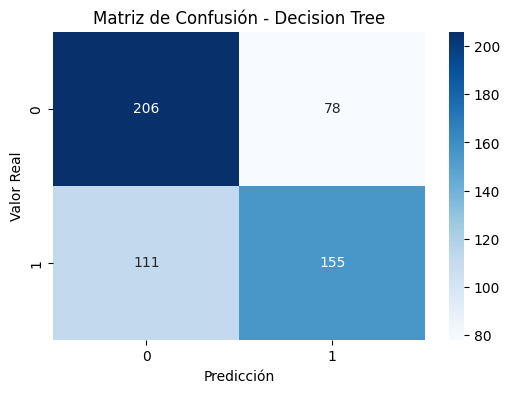

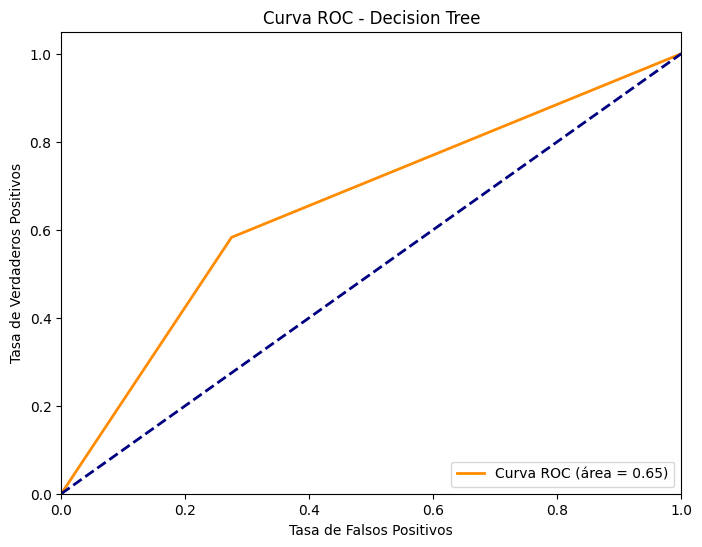


--- SVM ---
Mejores Hiperparámetros: {'classifier__C': np.float64(0.2363790402300169), 'classifier__degree': 4, 'classifier__gamma': np.float64(0.007742116473996248), 'classifier__kernel': 'rbf'}
Accuracy: 0.6545
Precision (binary): 0.6462
Recall (binary): 0.6316
F1-Score (binary): 0.6388
ROC AUC Score: 0.6678

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       284
           1       0.65      0.63      0.64       266

    accuracy                           0.65       550
   macro avg       0.65      0.65      0.65       550
weighted avg       0.65      0.65      0.65       550


Confusion Matrix:
[[192  92]
 [ 98 168]]


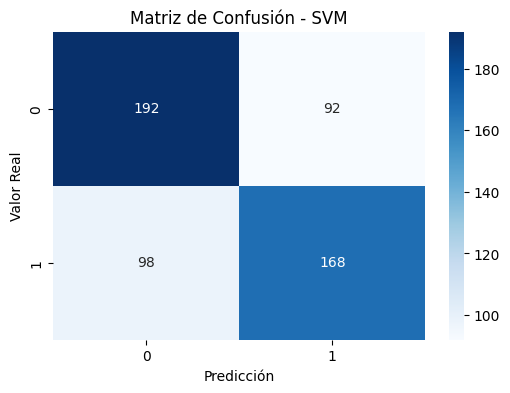

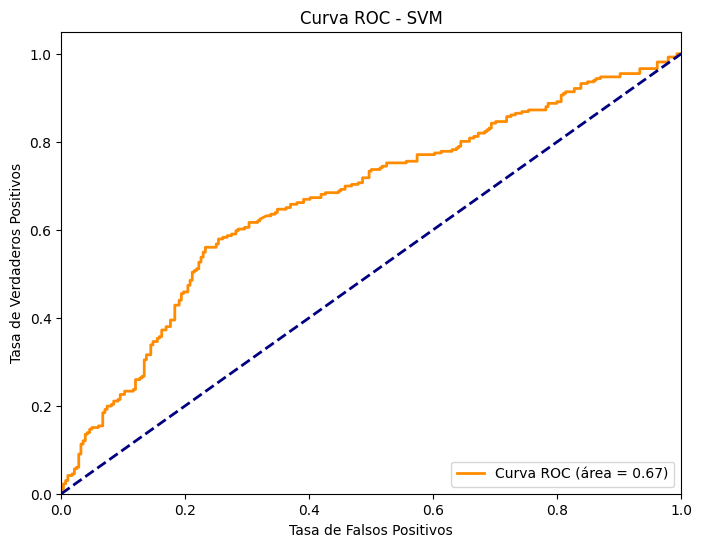


--- k-NN ---
Mejores Hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 30, 'classifier__p': 2, 'classifier__weights': 'distance'}
Accuracy: 0.6345
Precision (binary): 0.6199
Recall (binary): 0.6316
F1-Score (binary): 0.6257
ROC AUC Score: 0.6879

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       284
           1       0.62      0.63      0.63       266

    accuracy                           0.63       550
   macro avg       0.63      0.63      0.63       550
weighted avg       0.63      0.63      0.63       550


Confusion Matrix:
[[181 103]
 [ 98 168]]


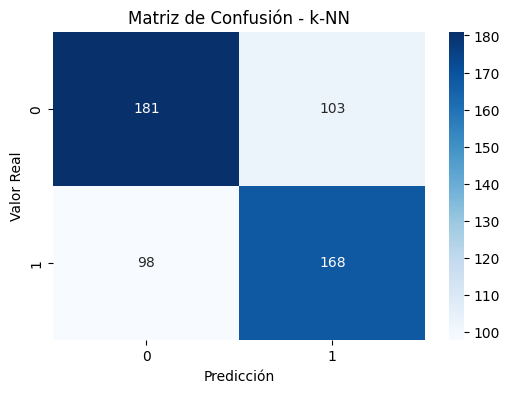

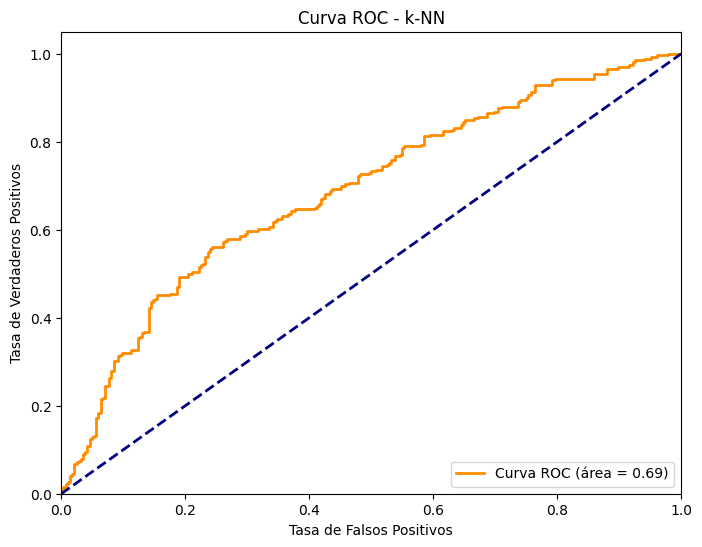

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline # Muy útil para encadenar preprocesamiento y modelo
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, loguniform
# --- 1. Carga de Datos (Asegúrate de tener tu archivo cargado) ---
# Asumiendo que tienes tus datos en un DataFrame llamado 'df'
# Ejemplo: df = pd.read_csv('tu_archivo_spotify.csv')
# Por ahora, crearé un DataFrame de ejemplo basado en tu descripción
# (REEMPLAZA ESTO CON TU CARGA DE DATOS REAL)


df.dropna(inplace=True)

# --- 2. Definición de Variables y Preprocesamiento Básico ---


# Definir características (X) y variable objetivo (y)
popularity_threshold = df['track_popularity'].median()
# popularity_threshold = 50 # Alternativa: usar un valor fijo

df['is_popular'] = (df['track_popularity'] > popularity_threshold).astype(int)

df_2022 = df[df['year'] == 2022].copy()
df_train_val = df[df['year'] != 2022].copy()

numerical_features = ['year', 'duration_s', 'interaction_dance_energy', 'interaction_valence_energy', 'interaction_loud_dance',
    'interaction_dance_valence', 'interaction_acoustic_energy',
    'danceability_sq', 'energy_sq', 'loudness_sq']
categorical_features = ['key', 'mode', 'time_signature']

features  = numerical_features + categorical_features

X = df_train_val[features]
y = df_train_val['is_popular']

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print("\nDistribución de la variable objetivo (mode):")
print(y.value_counts(normalize=True)) # Verificar si hay desbalanceo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# --- 5. Creación de Pipelines de Preprocesamiento y Modelado ---
# El pipeline ahora operará sobre los datos ya acotados (X_train_capped, X_test_capped)

numeric_pipeline = Pipeline([
    ('iqr_capper', IQROutlierCapper(factor=1.5)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'
)



# Pipeline para Árbol de Decisión
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Pipeline para SVM
pipe_svm = Pipeline([
   ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

# Pipeline para k-NN
pipe_knn = Pipeline([
   ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# --- 6. Optimización de Hiperparámetros con RandomizedSearchCV ---
# (Los espacios de búsqueda permanecen igual, pero se aplicarán a datos acotados)

param_dist_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': randint(3, 15), # Rango más restrictivo para la profundidad
    'classifier__min_samples_split': randint(5, 30), # Aumentado el mínimo
    'classifier__min_samples_leaf': randint(5, 30),  # Aumentado el mínimo
    'classifier__max_features': ['sqrt', 'log2', None], # Considerar subconjuntos de features
    'classifier__ccp_alpha': loguniform(0.001, 0.1) # Cost-Complexity Pruning
}

param_dist_svm = {
    'classifier__C': loguniform(0.01, 1000),
    'classifier__gamma': loguniform(0.0001, 1),
    'classifier__kernel': ['rbf', 'linear'], # Añadido poly para más opciones
    'classifier__degree': randint(2, 5) # Grado para kernel 'poly'
}

param_dist_knn = {
    'classifier__n_neighbors': randint(3, 31),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'], # Añadido minkowski
    'classifier__p': randint(1, 3) # Parámetro p para minkowski (1=manhattan, 2=euclidean)
}

n_iter_search = 30 # Reducido para ejecución más rápida del ejemplo, puedes aumentarlo

SCORING_METRIC = 'f1_weighted'

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=param_dist_dt, n_iter=n_iter_search,
                               cv=3, scoring=SCORING_METRIC, n_jobs=-1, random_state=42, error_score='raise') # cv=3 para demo
random_svm = RandomizedSearchCV(pipe_svm, param_distributions=param_dist_svm, n_iter=n_iter_search,
                                cv=3, scoring=SCORING_METRIC, n_jobs=-1, random_state=42, error_score='raise')
random_knn = RandomizedSearchCV(pipe_knn, param_distributions=param_dist_knn, n_iter=n_iter_search,
                                cv=3, scoring=SCORING_METRIC, n_jobs=-1, random_state=42, error_score='raise')


print("\n--- Entrenando y Optimizando Modelos con RandomizedSearchCV (sobre datos acotados) ---")
print("Entrenando Decision Tree...")
random_dt.fit(X_train, y_train)
print("Entrenando SVM...")
random_svm.fit(X_train, y_train)
print("Entrenando k-NN...")
random_knn.fit(X_train, y_train)
print("--- Entrenamiento Completado ---")

# --- 7. Evaluación de los Mejores Modelos en el Conjunto de Prueba ---

models_random = {
    "Decision Tree": random_dt.best_estimator_,
    "SVM": random_svm.best_estimator_,
    "k-NN": random_knn.best_estimator_
}

best_params_random = {
    "Decision Tree": random_dt.best_params_,
    "SVM": random_svm.best_params_,
    "k-NN": random_knn.best_params_
}

print("\n--- Evaluación de los Modelos Optimizados (RandomizedSearch) en datos de prueba acotados ---")

for name, model in models_random.items():
    print(f"\n--- {name} ---")
    print(f"Mejores Hiperparámetros: {best_params_random[name]}")

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    avg_method = 'binary'

    precision = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method )
    f1 = f1_score(y_test, y_pred, average=avg_method )

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision ({avg_method}): {precision:.4f}")
    print(f"Recall ({avg_method}): {recall:.4f}")
    print(f"F1-Score ({avg_method}): {f1:.4f}")

    if hasattr(model, "predict_proba"):
      try:
          y_pred_proba = model.predict_proba(X_test)[:, 1]
          roc_auc = roc_auc_score(y_test, y_pred_proba)
          print(f"ROC AUC Score: {roc_auc:.4f}")
      except Exception as e:
          print(f"No se pudo calcular ROC AUC Score: {e}")
          roc_auc = None # Para evitar error en plot si falla
    else:
      print("Este modelo no tiene predict_proba, no se calcula ROC AUC.")
      roc_auc = None


    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # Visualizar la matriz de confusión
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    if roc_auc is not None: # Solo graficar si se calculó ROC AUC
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('Tasa de Falsos Positivos')
            plt.ylabel('Tasa de Verdaderos Positivos')
            plt.title(f'Curva ROC - {name}')
            plt.legend(loc="lower right")
            plt.show()